# Applied Data Science Capstone Project

**Adam Rubins**

This is my final project for the [IBM Data Science Professional Certificate program](https://www.coursera.org/professional-certificates/ibm-data-science), submitted in the course [“Applied Data Science Capstone”](https://www.coursera.org/learn/applied-data-science-capstone) on [coursera](https://www.coursera.org/). The project is peer-reviewed. The objective of the project is to come up with a creative idea to leverage the Foursquare location data to explore or compare neighborhoods or cities. Alternatively, to come up with a problem that can be solved by using the Foursquare location data.

## Table of contents
1. [Introduction](#Introduction)
   1. [Business Problem](#Business-Problem)
   1. [Target Audience - the clients](#Target-Audience---the-clients)
   1. [Data introduction](#Data-introduction)
1. [Imports](#Imports)
1. [Data](#Data)
   1. [Google Maps & Google Cloud Translate](#Google-Maps-&-Google-Cloud-Translate)
   1. [TLV OpenData](#TLV-OpenData)
      1. [Municipality API - Population distribution by city neighborhoods](#Municipality-API---Population-distribution-by-city-neighborhoods)
   1. [Tel-Aviv Municipality API - GisLayers: a REST API for GIS](#Tel-Aviv-Municipality-API---GisLayers:-a-REST-API-for-GIS)
      1. [Parsing the GisLayers API results](#Parsing-the-GisLayers-API-results)
      1. [Additional Translating, Cleaning & Filtering](#Additional-Translating,-Cleaning-&-Filtering)
      1. [The Schools Data](#The-Schools-Data)
      1. [The Green Areas Data](#The-Green-Areas-Data)
      1. [The Neighborhoods Data](#The-Neighborhoods-Data)
      1. [The Dog Gardens, kindergartens & Daycares Data](#The-Dog-Gardens,-kindergartens-&-Daycares-Data)
      1. [The Playground Data](#The-Playground-Data)
   1. [Foursquare Places API](#Foursquare-Places-API)
1. [Methodology](#Methodology)
   1. [School exploration tools](#School-exploration-tools)
   1. [Pre-processing](#Pre-processing)
      1. [Merging the foursquare data with the TLV OpenData](#Merging-the-foursquare-data-with-the-TLV-OpenData)
      1. [One Hot Encoding](#One-Hot-Encoding)
      1. [Removing the schools to exclude](#One-Hot-Encoding)
      1. [Normalize the data over the standard deviation](#Normalize-the-data-over-the-standard-deviation)
1. [Modeling](#Modeling)
1. [Results](#Results)
   1. [Characterization of the clusters](Characterization-of-the-clusters)
1. [Discussion](#Discussion)
   1. [Highlighting candidate Schools in each cluster](##Highlighting-candidate-Schools-in-each-cluster)
1. [Custom-search-query](#Custom-search-query)
1. [Conclusion](#Conclusion)
1. [Reproducibility Appendix](#Reproducibility-Appendix)


# Introduction

## Business Problem

#### Project Goal

My project is devoted to exploring and segmenting elementary schools in Tel Aviv (a major city located in the centre of Israel), based on their proximity to other venues that are of particular interest to the client. The project aims to provide clients, who wish to live in close proximity to a school, with data concerning other venues in the area, in order to assist them in understanding and narrowing down their choices and eventually deciding where to rent an apartment. 

#### Background

I was inspired to create this project by a friend of mine, who is interested in moving with his family to the city of Tel Aviv. My friend, who currently lives in a suburban area, works in Tel Aviv and spends hours each day in traffic. He and his wife have decided to move to the city, sell their car and travel mainly by foot or, if necessary, public transportation. While he works in Tel Aviv, my friend is unfamiliar with most of its neighborhoods and needs my advice on the best area to search for an apartment.

Despite Tel Aviv being my hometown, I soon realized how easily one could become overwhelmed when approaching such a decision. Tel Aviv is Israel’s second most populous city, with approximately 450,000 residents. It is the financial capital of Israel, with the largest economy per capita in the Middle East. It hosts countless venues, including numerous schools and education venues. Its many neighborhoods differ greatly and provide for a wide variety of living environments.

My friend and his wife have no special financial limitations, as their employers subsidize their rent. However, they have a rather **long list of preferences**, as they do not wish to rely on private transportation and are looking for the most suitable environment to raise their two children. They have a six-year-old boy about to attend elementary school and a baby girl. They also have a dog. They wish to live in an area in which many venues are at a walking distance, which they consider to be approximately 500 meters. They are looking for a child-friendly environment, preferably a neighborhood with a relatively young demographic and many families with children.

The most fundamental requirement, as far as my friend and his wife are concerned, is that they want to rent a place adjacent to a elementary school. However, they would also like to live nearby a day care for toddlers; a playground for toddlers; a kindergarten; green areas; a dog garden; a pizzeria and ice cream parlor for their weekly “family tradition” and, preferably, a neighborhood bar (or pub), so that they could go on dates and easily return home quickly in case of an emergency. Additionally, my friend’s background is somewhat traditional. He thus strongly prefers not to expose his children to shady places such as strip clubs and would rather live far away from such places. 

As indicated above, one of my friend’s main concerns is education. In Israel, there are different types of schools (public/private; Jewish/non-Jewish; secular/religious) and the education a student receives may differ greatly based on the school in which he or she are enrolled. My friend, for instance, wants to send his son to a public, Jewish, secular school, and does not know which schools in Tel Aviv fit these criteria. The Israeli Board of Education publishes this data. It is important to note that the Board of Education also [provides data](http://ic.education.gov.il/QvAJAXZfc/opendoc_pc.htm?document=ShkifutReports.qvw&host=qvsprodlb&sheet=SH02&lang=en-US) on the quality of each school (test scores, etc.), however, when I attempted to integrate this data I realized that it was partial and outdated (last updated in 2017). I consulted the “client” (i.e., my friend) and he asked that I discard this data, as he is currently less interested in the quality of the school and more focused on finding a neighborhood that would meet the holistic needs of his family. 
My project was originally intended to help my friend find a suitable place for him to live, by addressing his specific needs. However, the parameters he has set for me are not so unique; many of my friends consider similar parameters when deciding where to live and it will be easy to adapt this analysis to fit different parameters. I believe that this project could assist them in making informed decisions on their living situations. Thus, while I initially planned to choose a project in the field of finance, designed for a business-oriented target audience, I decided that it would be preferable to focus on a concrete problem designed to help an actual client, rather than on an abstract problem designed for theoretical clients. In so doing, I aspire to create a project that has real practical value, without compromising the main objective of the assignment, which is demonstrating my skillset using location data.      
Therefore, the objective of my project is to explore and segment schools in Tel Aviv, based on the parameters that the client has set for me. The project is designed so that the client receives the relevant data on each cluster, thus allowing him to understand his possibilities, narrow down his choices and reach an informed decision independently.    


## Target  Audience - the clients

My project was designed for a specific client - my friend, who is a 32 year old male, married with 2 children and a pet dog. This is a middle class family that intends to move to the city of Tel Aviv. However, the target audience for this project is far wider, and includes young families that wish to live in Tel Aviv, in close proximity to an elementary school and in a child and family-friendly environment. 

**The Client's Particular Interest**

 The client's main particular interest is the proximity to elementary schools. These schools must abide by several specific parameters:
  * State (public); ownership: city.
  * Stream of education: Jewish 
  * Type of education: regular (secular)
  
 There are additional parameters that are of particular interest to the client, as listed bellow. He wishes to live in a walking distance from these venues, which he considers to be 500 meters. The client strongly prefers there to be a large variety of these venues of interest in close proximityproximity (for example, there is great advantage in a wide variety of kindergartens and daycares, as many may have long waiting lists):
* kindergartens (see specific parameters listed above for elementary schools)
* Playgrounds with at least one facility for toddlers (mostly interested in the number of playground facilities available nearby)
* Green public areas (mostly interested in the total green area in meters)
* Dog gardens
* Pizza places
* Ice cream parlours
* Pubs/bars (specific types of venues with no interest to the client were filtered out, as detailed in the full report in foursquare data collection). 
* Client does not wish to live in close proximity to strip clubs.
* Population distribution by age – the client prefers to live in a relatively young neighbourhood and considers 34 to be a young age. 

## Data introduction

I have used two main data sources. The first is **[TLV OpenData](https://opendata.tel-aviv.gov.il/en/Pages/home.aspx)**, a free publicly available website provided by the Tel Aviv-Yafo Municipality This website is dedicated to exposing the public datasets of the Tel Aviv-Yafo Municipality and is a great resource for getting data about Tel Aviv. However, many of the API’s are returning results in Hebrew and need to be translated. 
I use this website to retrieve the following data: 

1.	[Population distribution by city neighborhoods](https://opendata.tel-aviv.gov.il/en/pages/item.aspx?ids=1) – the data format is google sheet JSON. I use this data to calculate the proportion of young people (up to 34) in each neighborhood and eventually will match each school to the age of population in each neighborhood. Unfortunately, the most recent data available is from 2017. After consulting with the client, I will not use this data in the clustering process. However, I will use it to give the client an indication of the age distribution of the population, as well as to filter out schools located in neighborhoods where there are no people aged under 34.

1.	[API - developer portal](https://apiportal.tel-aviv.gov.il/) – among other things, this enables [GisLayers](https://apiportal.tel-aviv.gov.il/docs/services/59493e269f9e531074c17205/operations/59493ec69f9e531074c17209): a REST API for GIS (Geographic Information System) Layers. (Everything about municipal geographic) data. This data is provided in Hebrew and will be translated using google cloud translate (see below). From this API I will request the following JSON data:

   1.   Green areas (layer code 503, geometry: polygons) – For each school (from the elementary schools 2021 data), I will calculate the distance to each green area and will sum the total area (in meters) of all green areas whose territory begins within 500 meters from the school. 
   1. Neighborhoods (layer code 511, geometry: polygons) – I will match each school to the neighborhood in which it resides and will incorporate the population age distribution data to allow filtering out those schools that reside in neighborhoods with no young residents.
   1. Dog gardens (layer code 586, geometry: points) – for each school, I will count the number of dog gardens that are within 500 meters.   
   1. Kindergartens 2021 (layer code 598, geometry: points) – for each school, I will count the number of kindergartens that are within 500 meters.     
   1.	Elementary schools 2021 (layer code 599, geometry: points) - I will filter the data in accordance with the preferences set by the client and will use them as a proxy for their preferred place of residence.  
   1.	Recognized daycares for toddlers (layer code 624, geometry: points) – for each school, I will count the number of daycares that are within 500 meters.     
   1.	 Playgrounds (layer code 696, geometry: points) – I will filter only playgrounds with at least one facility for toddlers and will sum up the total number of playground facilities in the area.  


The second main data source I use is **Foursquare [Places API](https://developer.foursquare.com/docs/api)**, which offers real-time access to Foursquare’s global database of venue data and user content. As this is part of the project requirements, this is the first source I explored, however, it contained hardly any data on schools and other educational venues in Tel Aviv. Therefore, I searched for the missing data in the abovementioned open TLV, while using Foursquare Places API for data on the other categories. I utilized the Foursquare Places API [explore endpoint](https://developer.foursquare.com/docs/api/venues/explore) to find a list of the relevant venues near each school location. I only requested the following [venue categories](https://developer.foursquare.com/docs/resources/categories): 

* For the client’s family weekly tradition:
  *	Ice cream shop (category id.: 4bf58dd8d48988d1c9941735) – I group all venues that are returned under “ice cream”.
  *	Pizza place (category id.: 4bf58dd8d48988d1ca941735) – I group all venues that are returned under “pizza”.
* For fun for parents – – I group all venues that are returned under both categories below under “parents’ fun”, apart from venues that the client has instructed me to ignore (e.g., restaurants, hotels – the full list will be detailed in the full report in filtering process):
  * Bar (category id.: 4bf58dd8d48988d116941735)
  *	Pub (category id.: 4bf58dd8d48988d11b941735)
* Client’s request not to live near strip clubs (category id.: 4bf58dd8d48988d1d6941735)

Upon gathering all of the relevant information for each school, I utilize this information to segment the schools using K-Means clustering algorithm. This will allow me to characterize each cluster and hopefully to find the most relevant clusters for the client. Either way, it will help the client understand all the available options. I will highlight at least one school in each cluster that is most compatible with the parameters set by the client. Additionally, I will create a function that allows the client to get a full report for any school ID. 

In addition to these two main sources, I use a couple of google API’s for the following reasons:

* Google Maps – used to retrieve Tel Aviv-Yafo coordinates (latitude and longitude) and center most of my visualizations according to these coordinates and to obtain the properly formatted (English) addresses of the schools from the school geocode (latitude, longitude) data. 
* Google Cloud Translate Client – most of the data that is returned by the Tel-Aviv Municipality API is in Hebrew. Even the fields’ names that are written in English letters are mostly in phonetic Hebrew. Even though my client and I are fluent in Hebrew, in order to facilitate peer review for this analysis, I will translate (to English) the fields’ names and any fields’ values that will be used for filtering or understanding the data analysis. I will not translate the names of the venues (such as schools, day cares, kindergartens, etc.) and will be using system Id's in the report. Because it will be a pain to manually translate all of the relevant data I will be using **google cloud translate client** to do the translation for me. When it does not preform properly, I manually update the project dictionary. 


# Imports

In [1]:
from datetime import datetime           # for for manipulating dates and times
from geopy.distance import geodesic     # for calculate geodesic distance between two points
from shapely.geometry import shape      # for creating geometry objects with coordinates
from shapely.ops import nearest_points  # for finding the nearest points in a pair of geometries
import os                 # for setting environment variables (GOOGLE_APPLICATION_CREDENTIALS)
import sys                # for access to modules versions - for the reproducibility appendix 
import configparser       # for parsing 'data-science-capstone.ini' file where I store my project API's credentials
from pathlib import Path  # for representing filesystem paths with semantics appropriate for different operating systems.
import pickle             # for serializing and de-serializing a Python object.
import re                 # for regular expression matching operations
import json               # for parsing JSON (JavaScript Object Notation)
import requests           # HTTP library for Python, built for human beings  
import string             # for common string operations
import keyword            # allows a Python program to determine if a string is a keyword
import warnings           # The warnings filter controls whether warnings are ignored, displayed, or turned into errors.

# data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns       # for statistical data visualization
import folium               # for creating interactive maps 

# for data analysis and manipulation 
import pandas as pd     
import numpy as np

# specialized container datatypes
from collections import namedtuple, defaultdict, Counter

from itertools import zip_longest  # like zip, If the inputs with uneven len, missing values are filled-in with fillvalue.
from functools import partial      # for partial function which “freezes” some function’s arguments.
from functools import reduce # Apply function of two arguments of an iterable and reducing it to a single value.
import operator  # The operator module exports a set of functions corresponding to the intrinsic operators of Python.

# google api's
from google.cloud import translate # for creating google cloud translate Client
import googlemaps                  # for creating google maps Client 

from sklearn.preprocessing import StandardScaler  # for normalizing data over the standard deviation
from sklearn.cluster import KMeans                # KMeans clustering algorithm 

In [2]:
warnings.filterwarnings(action='ignore')
from yellowbrick.cluster import KElbowVisualizer  # to help data scientists select the optimal number of clusters


In [3]:
from IPython.core.display import HTML
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
config = configparser.ConfigParser() 
credentials = Path('./credentials/data-science-capstone.ini')
config.read(str(credentials)) # my Credentials are in the ini file

['credentials\\data-science-capstone.ini']

**Note: In this project, there are a number of interactive html maps created with folium.
Unfortunately the folium maps do not render on GitHub.
drop the github link to this .ipynb file into [nbviewer.jupyter.org](https://nbviewer.jupyter.org/) and get a full dynamic output**

# Data

## Google Maps & Google Cloud Translate

### Google Maps

I use Google Maps for two purposes. First, to retrieve the Tel Aviv-Yafo coordinates, which I use as the center for the map visualization in the project. Second, to obtain the properly formatted (English) addresses of the schools from the school geocode (latitude, longitude) data. I will obtain this data through the Tel-Aviv Municipality API (GisLayers REST API for Geographic Information System Layers).

In [5]:
GOOGLEMAPS_CLIENT_ID = config['googlemaps']['client_key']  # googlemaps ID
gmaps_Client = googlemaps.Client(key=GOOGLEMAPS_CLIENT_ID)  # create a googlemaps Client object

**Get Tel Aviv-Yafo Coordinates**

In [6]:
address = 'Tel Aviv-Yafo, Israel'
geocode_result = gmaps_Client.geocode(address)

In [7]:
# Save the Data
with open('geocode_result.pickle', 'wb') as f:
    pickle.dump(geocode_result, f, pickle.HIGHEST_PROTOCOL)

Parse the result

In [8]:
Geo_Record = namedtuple('Geo_Record', ['address', # the address input to the gmaps_Client
                                       # from the result structure of the gmaps_Client
                                       'formatted_address', 
                                       'location_type',
                                       'lat',
                                       'lng',
                                       'place_id',
                                       'types'])

def parse_geocodes(geocode_result_list, address):
    ''' Parse One geo Result Record'''
    geocode_dict = geocode_result_list[0] 
    formatted_address = geocode_dict['formatted_address']
    geometry = geocode_dict['geometry']
    location_type = geometry['location_type']
    lat, lng = geometry['location']['lat'], geometry['location']['lng']
    place_id = geocode_dict['place_id']
    types = '; '.join(geocode_dict['types'])
    return Geo_Record(address, formatted_address, location_type, lat, lng, place_id, types)

In [9]:
tel_aviv_address = parse_geocodes(geocode_result, address)
tel_aviv_address

Geo_Record(address='Tel Aviv-Yafo, Israel', formatted_address='Tel Aviv-Yafo, Israel', location_type='APPROXIMATE', lat=32.0852999, lng=34.78176759999999, place_id='ChIJH3w7GaZMHRURkD-WwKJy-8E', types='locality; political')

In [10]:
TA_LATITUDE, TA_LONGITUDE = tel_aviv_address.lat, tel_aviv_address.lng

For the second purpose of using Google Maps (getting school addresses) I first need to obtain the school Geodata, so |I will return to this task later.

### Google Cloud Translate

most of the data that is returned by the Tel-Aviv Municipality API is in Hebrew. Even the fields’ names that are written in English letters are mostly in phonetic Hebrew. Even though my client and I are fluent in Hebrew, in order to facilitate peer review for this analysis, I will translate (to English) the fields’ names and any fields’ values that will be used for filtering or understanding the data analysis. I will not translate the names of the venues (such as schools, day cares, kindergartens, etc.) and will be using system Id's in the report.

In [11]:
# Credentials Definition for google cloud translate Client
google_translate_credentials = Path('./credentials/geocoding-project-001-ds-server-acount.json')
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = str(google_translate_credentials)

# create a client object
translate_client = translate.Client(target_language='en') 

It is good practice to avoid sending unnecessary requests, whenever possible, to reduce costs and lag time over the internet. For this reason, i will store a global dictionary with the results of the calls and will check that dictionary before every translate request. Also, after every update to the dictionary I will pickle (save) the object to disk for future runs.

In [12]:
try: # try to open a saved dictionary
    with open('hebrew_english_dictionary.pickle', 'rb') as f:
        hebrew_english_dictionary = pickle.load(f)
except FileNotFoundError:  # if the file not found Create the global dictionary
    hebrew_english_dictionary = {} 

Function to translate a hebrew string to english:

In [13]:
def translate(hebrew_string,                          # a string to translate
              local_dict=hebrew_english_dictionary,   # a dictionary to retrieve the result from or to update after a call
              save=True,                         # if true save the dict after update
              save_name='hebrew_english_dictionary.pickle'):  # the name the file to save the dict to
    """return english translation of hebrew_string from the local_dict
    if the string is not in the dictionary it get the value from google translate and then update 
    the local_dict and saves it if save_dict is set to True"""
    if hebrew_string is None:
        return ''
    if local_dict is None:
        local_dict = {}
    if hebrew_string in local_dict:
        return local_dict[hebrew_string]
    else:   # translate using google cloud translate client
        result =  translate_client.translate(hebrew_string, source_language='he')['translatedText']
        # update  the local_dictsaves the hebrew_english_dictionary
        local_dict[hebrew_string] = result
        if save:
            # saves the local_dict
            save_dict(local_dict, save_name)
        return result
    
    
def save_dict(dict_=hebrew_english_dictionary, save_name='hebrew_english_dictionary.pickle'):
    """Pickling (saves) the dict_ object"""
    with open(save_name, 'wb') as f:
        pickle.dump(dict_, f, pickle.HIGHEST_PROTOCOL)

## TLV OpenData

Tel Aviv-Yafo Municipality has a free publicly available website [TLV OpenData](https://opendata.tel-aviv.gov.il/en/Pages/home.aspx) that is dedicated to expose the public datasets of Tel Aviv-Yafo Municipality.
It is a great resource for getting data about Tel Aviv though the results are in hebrew and will need to be translated.

###  Tel-Aviv Municipality API - Population distribution by city neighborhoods

The ["Population distribution by city neighborhoods"](https://opendata.tel-aviv.gov.il/en/pages/item.aspx?ids=1) file has data for population by neighborhoods, including population by age groups. There is data for the years: 2009-2017.

For this analysis, I will extract only the following 2017 data (most current that is available):
* neighborhood number (json path: \['feed'\]\['entry'\]\['gsx\\$neighborhoodcode'\]\['\$t'\])
* neighborhood english name (json path: \['feed'\]\['entry'\]\['gsx\\$neighborhoodnameen'\]\['\$t'\])
* date updated (json path: \['feed'\]\['entry'\]\['updated'\]\['\$t'\])
* total population (json path: \['feed'\]\['entry'\]\['gsx\\$total2017'\]\['\$t'\])
* population over 65 (json path: \['feed'\]\['entry'\]\['gsx\\$over652017'\]\['\$t'\])
* and the population age groups: 0-14, 14-24, 25-34, 35-44, 44-64 (will parse the string in the json path:  \['feed'\]\['entry'\]\['content'\]\['\$t'\])

Unfortunately, the most recent data available is from 2017. After consulting with the client, I will not use this data in the clustering process. However, I will use it to give the client an indication of the age distribution of the population, as well as to filter out schools located in neighborhoods where there are no people aged under 34.

Download *Tel Aviv-Yafo Population distribution by city neighborhoods* Data

In [14]:
ta_pop_google_sheet_json = 'https://spreadsheets.google.com/feeds/list/15bKWVjqkPaomllj1-Vcu65LYer1tmKqodTz3nSNyBl8/1/public/values?alt=json'
ta_json = requests.get(ta_pop_google_sheet_json).json() 

Save the JSON *(Tel Aviv-Yafo Population distribution by city neighborhoods)*

In [15]:
with open('ta_pop_google_sheet_json.pickle', 'wb') as f:
    pickle.dump(ta_json, f, pickle.HIGHEST_PROTOCOL)

Parse the JSON *(Tel Aviv-Yafo Population distribution by city neighborhoods)*

In [16]:
class Fields:
    """this class will be used for dynamically setting the age groups population values as attributes"""

# helpers, self documenting data structures
PopRecord = namedtuple('PopRecord', ['neighborhood_number',
                                     'neighborhood_name',
                                     'heb_name',
                                     'pop_total',
                                     'pop_over_65',
                                     'pop_45_64',
                                     'pop_35_44',
                                     'pop_25_34',
                                     'pop_15_24',
                                     'pop_0_14', 
                                     'updated'])
pop_records = []

# the age groups fields names
fields_2017_map = {'pop_0_14':   '_eo7vq',  # ages between 0 and 14 (the 14 is inclusive)
                   'pop_15_24':  '_epmg7',  # ages between 15 and 24 inclusive
                   'pop_25_34':  '_er10k',  # ages between 25 and 34 inclusive
                   'pop_35_44':  '_esfl1',  # ages between 35 and 44 inclusive
                   'pop_45_64':  '_a59y2',  # ages between 45 and 64 inclusive
                   # 'age_over65': 'over652017', I will use ['gsx$over652017']['$t'] entry keys for this feild
                   # 'all_ages':   'total2017'   I will use ['gsx$total2017']['$t'] entry keys for this feild
                  }

regex_pattern = '.*{}: (\\d*,?\\d*),'  # to match the values of the 'fields_2017_map' values
# for example for ages betwwen 0 and 14 the regex pattern would be
# 'age_0_14 = re.compile(r'.*_eo7vq: (\d*,?\d*),', re.DOTALL)'

# iteration over the entries to extract and convert if necessary the: 
# updated time, neighborhood_name, pop_total, pop_over_65
# data types: updated as datetime, neighborhood_name as str, all the pop columns as integers
for entry in ta_json['feed']['entry']:
    neighborhood_number = entry['gsx$neighborhoodcode']['$t']
    updated = datetime.strptime(entry['updated']['$t'], '%Y-%m-%dT%H:%M:%S.%f%z') 
    neighborhood_name = entry['gsx$neighborhoodnameen']['$t'].strip()
    heb_name = entry['gsx$neighborhoodname']['$t'].strip()
    pop_total = int(entry['gsx$total2017']['$t'].replace(',', '')) if  entry['gsx$total2017']['$t'] else 0
    pop_over_65 = int(entry['gsx$over652017']['$t'].replace(',', '')) if entry['gsx$over652017']['$t'] else 0
    
    # iteration over the fields_2017_map to extract the age groups values from the content key in the entry
    for field_name, field_value in fields_2017_map.items():
        field = re.match(regex_pattern.format(field_value), entry['content']['$t'], re.DOTALL)  # return match obj or None if not found
        field = int(field.group(1).replace(',', '')) if field else 0  # 0 if not found else the matched group string
        setattr(Fields, field_name, field)  # setting the value 
    pop_records.append(PopRecord(neighborhood_number,
                                 neighborhood_name,
                                 heb_name,
                                 pop_total,
                                 pop_over_65,
                                 Fields.pop_45_64, 
                                 Fields.pop_35_44,
                                 Fields.pop_25_34, 
                                 Fields.pop_15_24, 
                                 Fields.pop_0_14, 
                                 updated))

In [17]:
pop_df = pd.DataFrame(pop_records)
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   neighborhood_number  73 non-null     object             
 1   neighborhood_name    73 non-null     object             
 2   heb_name             73 non-null     object             
 3   pop_total            73 non-null     int64              
 4   pop_over_65          73 non-null     int64              
 5   pop_45_64            73 non-null     int64              
 6   pop_35_44            73 non-null     int64              
 7   pop_25_34            73 non-null     int64              
 8   pop_15_24            73 non-null     int64              
 9   pop_0_14             73 non-null     int64              
 10  updated              73 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(7), object(3)
memory usage: 6.4+ KB


**Basic Data Exploration**

In [18]:
pop_df.describe()

pop_total  pop_over_65    pop_45_64    pop_35_44     pop_25_34  \
count     73.000000    73.000000    73.000000    73.000000     73.000000   
mean    6080.671233   929.794521  1188.301370  1023.575342   1256.890411   
std     6728.289448   983.913458  1145.821632  1290.816655   2101.999673   
min        0.000000     0.000000     0.000000     0.000000      0.000000   
25%     1864.000000   287.000000   317.000000   224.000000    266.000000   
50%     5040.000000   747.000000  1157.000000   761.000000    666.000000   
75%     8193.000000  1218.000000  1571.000000  1246.000000   1296.000000   
max    33983.000000  4436.000000  5786.000000  6896.000000  10713.000000   

         pop_15_24     pop_0_14  
count    73.000000    73.000000  
mean    556.972603  1125.136986  
std     494.207305  1057.100309  
min       0.000000     0.000000  
25%     106.000000   126.000000  
50%     527.000000   977.000000  
75%     819.000000  1572.000000  
max    2102.000000  4599.000000

**Calculating the proportion of young people (up to 34) in each neighborhood**

In [19]:
pop_df['young_pop_0_34'] = pop_df.loc[:, ['pop_0_14', 'pop_15_24', 'pop_25_34']].sum(axis=1)
pop_df['percent of ages 0-34 from total_pop'] = pop_df['young_pop_0_34'] / pop_df['pop_total']  # if pop_total==0 -> NaN
pop_df['percent of ages 0-34 from total_pop'] = pop_df['percent of ages 0-34 from total_pop'].fillna(0) 
pop_df_not_empty = pop_df.loc[pop_df['pop_total'] != 0, :].copy()  # only records with population
pop_df_not_empty.sort_values(by='pop_total', ascending=False, inplace=True)

Visualizing the Data

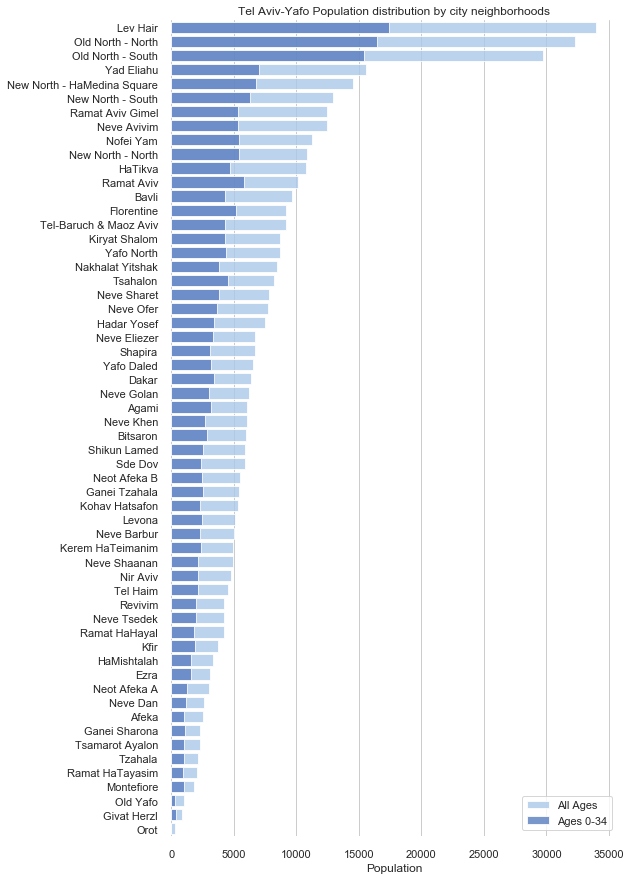

In [20]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 15))

# Plot the total pop
sns.set_color_codes("pastel")
sns.barplot(x="pop_total", y="neighborhood_name", data=pop_df_not_empty, label="All Ages", color="b", alpha=0.8)

# Plot the population of ages 0-34
sns.set_color_codes("muted")
sns.barplot(x="young_pop_0_34",  y="neighborhood_name", data=pop_df_not_empty, label="Ages 0-34", color="b", alpha=0.8)


# Add a legend and informative axis label
ax.legend(ncol=1, loc="best", frameon=True)
ax.set(title='Tel Aviv-Yafo Population distribution by city neighborhoods',
       ylabel="",
       xlabel="Population")
sns.despine(left=True, bottom=True)
plt.savefig('population_distribution_by_city_neighborhoods.png')

## Tel-Aviv Municipality API -  *GisLayers*: a REST API for GIS (Geographic Information System) Layers.

Also available in [TLV OpenData](https://opendata.tel-aviv.gov.il/en/Pages/home.aspx) is an [API - developer portal](https://apiportal.tel-aviv.gov.il/)
that enables, among other things, [GisLayers](https://apiportal.tel-aviv.gov.il/docs/services/59493e269f9e531074c17205/operations/59493ec69f9e531074c17209): a REST API for GIS (Geographic Information System) Layers. (Everything about municipal geographic) data. 

 In order to get the available information layers codes I need just to request LayersCodes:

In [21]:
try:
    with open('layers_codes_json.pickle', 'rb') as f:
        layers_codes_json = pickle.load(f)
except FileNotFoundError:
    # send a request
    layers_codes_json = requests.get('https://api.tel-aviv.gov.il/gis/LayersCodes').json()
    # save the data
    with open('layers_codes_json.pickle', 'wb') as f:
        pickle.dump(layers_codes_json, f, pickle.HIGHEST_PROTOCOL)

parse and translate the layers codes json

In [22]:
layers_codes = [] 
LayerCode = namedtuple('LayerCode', 'code hebrew_name english_name')
for code, hebrew_name in (layer.values() for layer in layers_codes_json):
    english_name = translate(hebrew_name, save=False)  # Don't save on each iteration
    layers_codes.append(LayerCode(int(code), hebrew_name, english_name))

# Saving the 'hebrew_english_dictionary' after potential update
with open('hebrew_english_dictionary.Pickle', 'wb') as f:
    pickle.dump(hebrew_english_dictionary, f, pickle.HIGHEST_PROTOCOL)

After examining the layers that are available and the client preferences I found the following relevant layer codes:

In [23]:
relevant_layer_codes =  [503, 511, 586, 598 ,599, 624, 696]
[layer for layer in layers_codes if layer.code in relevant_layer_codes]

[LayerCode(code=503, hebrew_name='שטחים ירוקים', english_name='Green areas'),
 LayerCode(code=511, hebrew_name='שכונות', english_name='neighborhoods'),
 LayerCode(code=586, hebrew_name='גינות כלבים', english_name='Dog gardens'),
 LayerCode(code=598, hebrew_name="גני ילדים תשפ''א", english_name='Preschools'),
 LayerCode(code=599, hebrew_name="בתי ספר תשפ''א", english_name='Schools'),
 LayerCode(code=624, hebrew_name='מעונות מוכרים לגיל הרך', english_name='Recognized preschool'),
 LayerCode(code=696, hebrew_name='גני משחקים', english_name='Playgrounds')]

Google translate didnt do a great job in translating daycares (code 624). I will give them better names:

In [24]:
json_objects_names = ['green_areas_json',
                      'neighborhoods_json',
                      'dog_gardens_json',
                      'kindergartens_json',
                      'schools_json',
                      'daycares_json', 
                      'playgrounds_json']

# will be useful later when dynamically Parsing records of each json
namedtuple_class_names = ['Greens',
                          'Neighborhood',
                          'DogGarden',
                          'Kindergarten',
                          'School',
                          'Daycare',
                          'Playground']

To get the Layer data, I will use the Layer API that returns GIS layer data from received three digit layers number.

In [25]:
GIS_LAYER_API = 'https://api.tel-aviv.gov.il/gis/Layer?layerCode'

layers_jsons = []
# Create json objects and dynamically assign variable name to them based on 'json_objects_names' list
for obj_name, layer_code in zip(json_objects_names, relevant_layer_codes):
    globals()[obj_name] = requests.get(f'{GIS_LAYER_API}={layer_code}').json()
    layers_jsons.append(globals()[obj_name])

Save the data after getting the results:

In [26]:
with open('layers_jsons.Pickle', 'wb') as f:
    pickle.dump(layers_jsons, f, pickle.HIGHEST_PROTOCOL)

### Parsing the GisLayers API results

The Json files may have different attributes but all share a similar structure. I can find the attributes names in the 'fieldAliases' field (except the coordinates attributes). The names of the json attributes fields are in phonetic hebrew and 'fieldAliases' dict values are in hebrew. So I will first translate the attributes names (even though I will not need all of the fields for each json file).

In [27]:
print(r'The Number of attributes (columns) in each json (not including coordinates attributes):', end='\n\n')
for name, json_file in zip(json_objects_names, layers_jsons):
    print(f'{name:19}: {len(json_file["fieldAliases"])}')

The Number of attributes (columns) in each json (not including coordinates attributes):

green_areas_json   : 11
neighborhoods_json : 6
dog_gardens_json   : 9
kindergartens_json : 39
schools_json       : 37
daycares_json      : 9
playgrounds_json   : 31


In [28]:
hebrew_english_dictionary.update({'תאריך טעינה': 'import_date',
                                  'ID': 'id_'})  # updating the dict with known translation api mistakes

In [29]:
# Add translated attributes names for each json:
for json_file in layers_jsons:
    json_file['english_translation'] = {}  # add english_translation to json
    for phonetic_hebrew, hebrew_field_name in json_file['fieldAliases'].items():
        json_file['english_translation'].update({phonetic_hebrew: translate(hebrew_field_name)})

Having a shared structure makes it appropriate to write some **helper functions** for parsing the data

In [30]:
def clean_name(field_name):
    '''takes a 'field_name' string and return a valid string for namedtuple field '''
    name =  field_name.replace(' ', '_').lower() # strip spaces and lowering the name
    for char in string.punctuation: 
        name = name.replace(char, '_')  # strip punctuation
    if name[0] in set('0123456789_'):
        name = 'field_' + name  # name cant start with a number or _
    if keyword.iskeyword(name):
        name = name + '_' # name cant be a python keyword
    return name

def create_named_tuple_class(json_file, tuple_name):
    '''creates a namedtuple class with the name 'tuple_name', the fields names are extracted from the json_file,
    after translation of the hebrew names to english via the google cloud translate api.
    each name get's 'clean' with the 'clean_name' function to make sure the name is valid and reproducible from the json_file
    '''
    tuple_class = namedtuple(tuple_name, [clean_name(field)
                 for field in json_file['english_translation'].values()] + ['coordinates'], rename=True)
    return tuple_class

Dynamically define namedtuple class

In [31]:
tel_aviv_layers =  [create_named_tuple_class(json_file, class_name) 
                     for json_file, class_name in zip(layers_jsons, namedtuple_class_names)]
tel_aviv_layers

[__main__.Greens,
 __main__.Neighborhood,
 __main__.DogGarden,
 __main__.Kindergarten,
 __main__.School,
 __main__.Daycare,
 __main__.Playground]

Examining the fields after translation

In [32]:
for namedtuple_class in tel_aviv_layers:
    name, fields = namedtuple_class.__name__, namedtuple_class._fields
    print(f'{name} Fields:')
    for i, field in enumerate(fields, start=1):
        print(f'  {i}. {field}')

Greens Fields:
  1. identification_of_area_data
  2. abundance_number
  3. garden_name
  4. garden_type
  5. garden_area
  6. name_of_supervisor
  7. name_of_contractor
  8. the_garden_label
  9. accessibility
  10. area
  11. system_id
  12. coordinates
Neighborhood Fields:
  1. identifying_a_neighborhood_mag
  2. neighborhood_number
  3. import_date
  4. area
  5. neighborhood_name
  6. system_id
  7. coordinates
DogGarden Fields:
  1. mega_id
  2. garden_number
  3. street_name
  4. house_number
  5. garden_name
  6. installation_description
  7. import_date
  8. activity_time
  9. system_id
  10. coordinates
Kindergarten Fields:
  1. institution_code
  2. institution_name
  3. street_name
  4. house_number
  5. entrance
  6. state_institution_code
  7. activity_description
  8. description_of_education_stage
  9. from_a_classroom
  10. up_to_grade
  11. description_stream_of_education
  12. description_of_education_sector
  13. description_of_type_of_education
  14. description_of_

Note: the reason I didn't yet unpack the coordinates to separate fields is that not all layers have the same geometry type

In [33]:
tel_aviv_parsed = [] # store the parsed data for each json
for tuple_class, json_file in zip(tel_aviv_layers, layers_jsons):
    records = [] 
    for record in json_file['features']:
        try:
            coordinates = record['geometry']['rings'] # if geometry type is a 'polygon'
        except KeyError:
            coordinates = record['geometry'] # for geometry type 'point'
        # replace the fontic key with the eng key
        attributes =  record['attributes']
        record = {clean_name(json_file['english_translation'][fontic_name]): heb_value # the values are still in hebrew 
                  for fontic_name, heb_value in attributes.items()}
        record.update({'coordinates': coordinates})
        if hasattr(record, 'import_date'):
            record['import_date'] = datetime.strptime(record['import_date'], '%d/%m/%Y %H:%M:%S')
        try:
            records.append(tuple_class(**record))
        except TypeError as ex: 
            # if there is an error - print info to help with debuging
            print(ex)
            print('len(record):', len(record))
            print('record_keys:', [clean_name(s) for s in record.keys()])
            raise ex
    else:  # if the loop ended with no exceptions then print a message
        print(f'parsed {tuple_class.__name__:18} with no errors')
    tel_aviv_parsed.append(records)

parsed Greens             with no errors
parsed Neighborhood       with no errors
parsed DogGarden          with no errors
parsed Kindergarten       with no errors
parsed School             with no errors
parsed Daycare            with no errors
parsed Playground         with no errors


**Creating Pandas DataFrames**

In [34]:
# dynamically create names for pandas dataframes
data_frames_names = [records[0].__class__.__name__.lower() + '_df' for records in tel_aviv_parsed]
# create a list of pandas dataframes of the tel_aviv_parsed data datasets
data_frames = [pd.DataFrame(records) for records in tel_aviv_parsed]
# set global variables for the dataframes 
for name, df in zip(data_frames_names, data_frames):
    globals()[name] = df  # dynamic variable name setting
data_frames_names

['greens_df',
 'neighborhood_df',
 'doggarden_df',
 'kindergarten_df',
 'school_df',
 'daycare_df',
 'playground_df']

For all the DataFrames except for *green areas* and *neighborhoods* the coordinates field contains a dictionary of longitude (the 'x' key) and latitude (the 'y' key). so I will transform it to different columns

In [35]:
for df in data_frames[2:]: 
    df['longitude'] = df.coordinates.apply(lambda coordinates: coordinates['x'])
    df['latitude'] = df.coordinates.apply(lambda coordinates: coordinates['y'])

Transforming 'NaN' strings to nan (not a number/missing) objects

In [36]:
for df in data_frames:
    df.replace({'NaN': np.nan}, inplace=True)

### Additional Translating, Cleaning & Filtering

For each dataframe, I will Filter the relavent rows and columns. In order to make the process more transparent I will translate some of the relevant data to english.

In [37]:
def translate_sequence(sequence):
    '''function for translating a pandas Series values (or any sequence) from hebrew to english.
    the function only sending unique records to the cloud translate api and only if the hebrew name is not in 
    glabal hebrew_english_dictionary. if the value is not in the dict then the function mutates the dictionary by adding 
    the new words to it (after getting the result from the api)
    it returns a pandas Series with the english values'''
    results = {}
    name = getattr(sequence, 'name', None) # if the sequence obj has a name else is none
    name = f'english_{name}' if name else name  # add english to the name if there was one 
    for heb_value in set(sequence):  # iterate over a unipue set of hebrew names 
        results[heb_value] = translate(heb_value)
    # return a translated pandas series  
    return pd.Series([results[heb_value] for heb_value in sequence], name=name)

In the next cells I will make definitions following execution for:
* Columns to translate
* Rows to filter
* Columns to filter

The design in the next cells may look a bit verbose but I found it enables easy and fast iteration and experimentation with different definitions for each dataframe.

In [38]:
# Definition for Columns to translate for each dataframe (to determine rows filters)

greens_columns_to_translate = ['the_garden_label']
neighborhoods_columns_to_translate = None
doggardens_columns_to_translate = None

kindergartens_columns_to_translate = [
    'description_of_education_stage', # Google translate didn't do well here but the field only have 5 unique values
                                       # see hebrew_english_dictionary update below
    'description_stream_of_education',
    'description_of_education_sector',
    'description_of_type_of_education',
    'description_of_ownership'
]

schools_columns_to_translate = kindergartens_columns_to_translate  
daycares_columns_to_translate = ['the_frame_type']
playgrounds_columns_to_translate = ['site_type']

columns_to_translate = [
    greens_columns_to_translate,                     # greens_df
    neighborhoods_columns_to_translate,              # neighborhoods_df 
    doggardens_columns_to_translate,                 # doggardens_df   
    kindergartens_columns_to_translate,              # kindergartens_df
    schools_columns_to_translate,                    # schools_df
    daycares_columns_to_translate,                   # daycares_df
    playgrounds_columns_to_translate                 # playgrounds_df
]

hebrew_english_dictionary.update({  # values of 'description_of_education_stage' 
    'יסודי': 'Elementary',
    'על יסודי': 'Post_Elementary',
    'אחר': 'Other',
    'גנים': 'kindergartens'
})

hebrew_english_dictionary.update({  # some of the values of 'the_garden_label' (greens) and  'site_type' (playgrounds)
    'חורשה': 'grove',
    'גינה': 'garden',    
    'חוף': 'Beach',
    'פס ירק': 'Green stripe'
})

In [39]:
# replace the hebrew values with english values for each coloumn as defined for each dataframe in 'columns_to_translate'
for df, columns, df_name in zip(data_frames, columns_to_translate, data_frames_names):
    if columns is None:
        continue
    print(df_name + ':', end='\n\n')
    print('Column name\t\t\t    Unique translated fields')
    print('_' * 100)
    for col in columns:
        df[col] = translate_sequence(df[col]) # replace the hebrew values with english values for each coloumn
        print(f'{col:35}:{df[col].unique()}')
    print(end='\n\n\n')


greens_df:

Column name			    Unique translated fields
____________________________________________________________________________________________________
the_garden_label                   :['Vegetable stripe' 'Beach' 'Traffic island' 'garden' 'grove' 'A garden'
 'Temporary grove' 'Playground']



kindergarten_df:

Column name			    Unique translated fields
____________________________________________________________________________________________________
description_of_education_stage     :['kindergartens' 'Other']
description_stream_of_education    :['state' 'Special' 'dimension' 'Arabic' 'orthodox' 'Irrelevant']
description_of_education_sector    :['Jewish' 'Not set' 'Arabic' 'Other']
description_of_type_of_education   :['Regular' 'Special']
description_of_ownership           :['urban' 'Unknown' 'Other public' 'Private' 'Used in municipalities']



school_df:

Column name			    Unique translated fields
______________________________________________________________________________

After consulting with the client, I will not filter the daycares because both types ('Daycare' 'Family home') are acceptable. Note that there is only one type of playground in the playgrounds_df 'type_of_garden' column so I didnt bother to translate it. I will define the rows filter in the next cell.

In [40]:
# Definition for Rows to filter for each dataframe

greens_filters = {
    'the_garden_label': lambda green_type: green_type not in {'Traffic island', 'Temporary grove'},
    'area': lambda num: num > 0                          # only greens with an area bigger then 0 meters
}
neighborhoods_filters = None
doggardens_filters = None
kindergarten_filters = {
    'description_of_education_stage': 'kindergartens',   # elementary school
    'description_stream_of_education': 'state',          # state kindergarten
    'description_of_education_sector': 'Jewish',         # Jewish kindergarten
    'description_of_type_of_education': 'Regular',       # regular non religious kindergarten
    'description_of_ownership': 'urban'                  # kindergarten of the city
}

school_filters = {
    'description_of_education_stage': 'Elementary',      # elementary school
    'description_stream_of_education': 'state',          # state school
    'description_of_education_sector': 'Jewish',         # Jewish school
    'description_of_type_of_education': 'Regular',       # regular non religious school
    'description_of_ownership': 'urban'                  # School of the city
}

daycares_filters = None
playground_filters = {
    'toddler_code': 1,                                   # have a facility for toddlers
    'a_number_of_facilities': lambda num: num > 0,       # only playgrounds with facilities
    'site_type': lambda site_type: site_type != 'Temporary grove'  
}

filter_rows_list = [
    greens_filters,                                  # greens_df 
    neighborhoods_filters,                           # neighborhoods_df - no rows need filtering
    doggardens_filters,                              # doggardens_df - no rows need filtering
    kindergarten_filters,                            # kindergartens_df
    school_filters,                                  # schools_df
    daycares_filters,                                # daycares_df - no rows need filtering
    playground_filters                               # playgrounds_df 
]

In [41]:
data_frames_for_analysis = []
print('Filtering out irrelevant rows:', end=f'\n{"_"*75}\n')
for df, filter_dict, df_name in zip(data_frames, filter_rows_list, data_frames_names):
    if filter_dict is None:  # dont filter if the filter is None
        data_frames_for_analysis.append(df)
        continue
    else:
        print(f'{df_name:20} Rows before filtering: {df.shape[0]:4}', end=', ')
        for column, filter_obj in filter_dict.items():
            if isinstance(filter_obj, list):  # if the filter is a list filter only values from the list
                df = df[df[column].apply(lambda s: s in filter_obj)]
            elif hasattr(filter_obj, '__call__'):  # if the filter is a function apply the function
                df = df[df[column].apply(filter_obj)]
            else:  # the filter is a values
                df = df.loc[df[column] == filter_obj, :]
        data_frames_for_analysis.append(df)    
        print(f'Rows after filtering: {df.shape[0]}')

Filtering out irrelevant rows:
___________________________________________________________________________
greens_df            Rows before filtering: 1000, Rows after filtering: 706
kindergarten_df      Rows before filtering:  659, Rows after filtering: 419
school_df            Rows before filtering:  211, Rows after filtering: 56
playground_df        Rows before filtering:  385, Rows after filtering: 66


**Handling missing values**

In [42]:
for df_name, df in zip(data_frames_names, data_frames_for_analysis):
    try:
        assert df.system_id.isna().sum() == 0        
        assert df.system_id.duplicated().sum() == 0  
    except AttributeError:
        assert df.site_code.isna().sum() == 0        
        assert df.site_code.duplicated().sum() == 0 
    if df_name in {'neighborhood_df', 'greens_df'}:
        continue
    print(f'{df_name}:\n\t latitude has {df.latitude.isna().sum()} missing values; longitude has {df.longitude.isna().sum()} missing values.')

doggarden_df:
	 latitude has 4 missing values; longitude has 4 missing values.
kindergarten_df:
	 latitude has 0 missing values; longitude has 0 missing values.
school_df:
	 latitude has 0 missing values; longitude has 0 missing values.
daycare_df:
	 latitude has 0 missing values; longitude has 0 missing values.
playground_df:
	 latitude has 0 missing values; longitude has 0 missing values.


In [43]:
for name, df in zip(data_frames_names, data_frames_for_analysis):
    globals()[name] = df  # dynamic variable name setting

In [44]:
doggarden_df.shape

(92, 12)

Because only 4 (out of 92, less then 5%) dog parks data are missing I will just remove those records from the dataframe

In [45]:
doggarden_df.dropna(subset=['latitude', 'longitude'], inplace=True)
doggarden_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 91
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mega_id                   88 non-null     int64  
 1   garden_number             76 non-null     float64
 2   street_name               88 non-null     object 
 3   house_number              88 non-null     int64  
 4   garden_name               88 non-null     object 
 5   installation_description  88 non-null     object 
 6   import_date               88 non-null     object 
 7   activity_time             13 non-null     object 
 8   system_id                 88 non-null     object 
 9   coordinates               88 non-null     object 
 10  longitude                 88 non-null     float64
 11  latitude                  88 non-null     float64
dtypes: float64(3), int64(2), object(7)
memory usage: 8.9+ KB


In [46]:
# Definition for columns to filter for each dataframe for the rest of the data analysis

greens_coloumns_for_analysis = [
    'system_id',                                    # composed of the layer code and the identification_of_area_data
    'the_garden_label',
    'garden_number',
    'area',
    'coordinates'                                   # a list of geometry polygons that will be used to build geojson file   
]

neighborhood_coloumns_for_analysis = [
    'system_id',                                    # composed of the layer code and the city neighborhood number
    'neighborhood_number',
    'neighborhood_name',
    'coordinates'                                   # a list of geometry polygons that will be used to build geojson file
]

doggardens_coloumns_for_analysis = [
    'system_id',                                    # composed of the layer code and the id number
    'garden_number',
    'longitude',
    'latitude'
]

kindergarten_coloumns_for_analysis = [
    'system_id',                                    # composed of the layer code and the kindergarten id
    'institution_name',                             # kindergarten name in hebrew
    'longitude',
    'latitude'                                           
]

school_coloumns_for_analysis = [
    'system_id',                                    # composed of the layer code and the city school id
    'institution_name',                             # school name in hebrew
    'longitude',
    'latitude'                                           
]

daycare_coloumns_for_analysis = [
    'system_id',                                    # composed of the layer code and the daycare id
    'frame_name',                                   # daycare name in hebrew
    'longitude',
    'latitude'   
]

playground_coloumns_for_analysis = [
    'site_code',  # there is no system_id on this df I will add it later for consistency
    'longitude',
    'latitude',
    'site_type',
    'a_number_of_facilities'
]

columns_filters = [
    greens_coloumns_for_analysis,
    neighborhood_coloumns_for_analysis,
    doggardens_coloumns_for_analysis,
    kindergarten_coloumns_for_analysis,
    school_coloumns_for_analysis,
    daycare_coloumns_for_analysis,
    playground_coloumns_for_analysis 
]

In [47]:
# filter all dataframes based of the definitions above
for df, filters, index in zip(data_frames_for_analysis, columns_filters, range(len(data_frames_for_analysis))):
     data_frames_for_analysis[index] = df.filter(items=filters)

# assign the clean dataframes to there names by directly accessing the global dictionary
for name, df in zip(data_frames_names, data_frames_for_analysis):
    globals()[name] = df

**Adding geometry objects to the DataFrames**

Adding *polygons* geometry to the greens_df & neighborhood_df (and addind *point* geometry to the school_df) will help to determine if a school is in a neighborhood or to calculate the distance between a school and a green area.

In [48]:
def adding_points_objects_to_df(df):
    ''' Add's 'Point' objects to dataframe
    df: dataframe with coordinates column'''
    df['points'] = [
        shape({'type': 'Point', 'coordinates': (df_row.longitude, df_row.latitude)}) for _, df_row in df.iterrows()
    ]
    
def tupleize_coordinates(coordinates):
    '''The function takes polygon string coordinates that are returned from the Tel Aviv municipality API and transforms 
    into a list of tuples suitable for creating polygon objects using the shapely package'''
    return [[(lon, lat) for lon, lat in coord] for coord in coordinates]

def adding_polygons_objects_to_df(df):
    ''' Add's 'Polygon' objects to dataframe
    df: dataframe with coordinates column'''
    df['polygons'] = [
        shape({'type': 'Polygon', 'coordinates': tupleize_coordinates(df_row.coordinates)}) for _, df_row in df.iterrows()
    ]

In [49]:
for i, df in enumerate(data_frames_for_analysis):
    if i < 2: # Only Green Areas & neighborhood
        adding_polygons_objects_to_df(df)
    else:
        adding_points_objects_to_df(df)

### The Schools Data

Basic data exploration

In [50]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 210
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   system_id         56 non-null     object 
 1   institution_name  56 non-null     object 
 2   longitude         56 non-null     float64
 3   latitude          56 non-null     float64
 4   points            56 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.6+ KB


In [51]:
school_df.head()

system_id institution_name  longitude   latitude  \
0  599-300070              ארן  34.790260  32.108128   
1  599-300150            ארנון  34.784813  32.088542   
2  599-300230        צוקי אביב  34.794272  32.125635   
3  599-300310       כוכב הצפון  34.786380  32.101471   
4  599-300490       יהודה מכבי  34.784702  32.092574   

                                        points  
0    POINT (34.790259756694 32.10812820184408)  
1   POINT (34.7848129994323 32.08854244352671)  
2  POINT (34.79427209646924 32.12563548292588)  
3  POINT (34.78637968904724 32.10147101961964)  
4   POINT (34.78470188636309 32.0925735999618)

**Getting school addresses**

In [52]:
# This is my second use of Google Maps
def get_address_from_geocode(lat_lon_tuple):
    '''Look up an address with reverse geocoding'''
    reverse_geocode_result = gmaps_Client.reverse_geocode(lat_lon_tuple)
    return reverse_geocode_result[0]['formatted_address']

In [53]:
try:
    with open('school_address.pickle', 'rb') as f:
        school_address = pickle.load(f)
except FileNotFoundError:
    school_address = {}
    for _, row in school_df.iterrows():
        school_id = row.system_id
        school_address[school_id] = get_address_from_geocode((row.latitude, row.longitude))
    # Save the Data after updateing the address grom google maps
    with open('school_address.pickle', 'wb') as f:
        pickle.dump(school_address, f, pickle.HIGHEST_PROTOCOL)

In [54]:
school_address_df = pd.DataFrame(school_address.items())
school_address_df.rename({0: 'system_id', 1: 'school_address'}, axis=1, inplace=True)

In [55]:
school_df = school_df.merge(school_address_df, on='system_id')

In [56]:
school_df.head()

system_id institution_name  longitude   latitude  \
0  599-300070              ארן  34.790260  32.108128   
1  599-300150            ארנון  34.784813  32.088542   
2  599-300230        צוקי אביב  34.794272  32.125635   
3  599-300310       כוכב הצפון  34.786380  32.101471   
4  599-300490       יהודה מכבי  34.784702  32.092574   

                                        points  \
0    POINT (34.790259756694 32.10812820184408)   
1   POINT (34.7848129994323 32.08854244352671)   
2  POINT (34.79427209646924 32.12563548292588)   
3  POINT (34.78637968904724 32.10147101961964)   
4   POINT (34.78470188636309 32.0925735999618)   

                                school_address  
0    Yehuda Burla St 25, Tel Aviv-Yafo, Israel  
1    David Yellin St 11, Tel Aviv-Yafo, Israel  
2  Yair Rozenblum St 11, Tel Aviv-Yafo, Israel  
3     Abba Kovner St 16, Tel Aviv-Yafo, Israel  
4        Antigonus St 6, Tel Aviv-Yafo, Israel

Interactive map visualization

In [57]:
tel_aviv_map = folium.Map([TA_LATITUDE, TA_LONGITUDE], zoom_start=12)

for _, school in school_df.iterrows():
    folium.Marker(location=[school.latitude, school.longitude],
                popup=school.system_id + ' - ' + school.institution_name,
                icon=folium.Icon(icon='home', icon_color='purple', icon_size=(1, 1))).add_to(tel_aviv_map)
                  
tel_aviv_map.save('all_schools_map.html')
HTML(tel_aviv_map._repr_html_())

Note: Unfortunately the folium maps do not render on GitHub.
drop the github link to this .ipynb file into [nbviewer.jupyter.org](https://nbviewer.jupyter.org/) and get a full dynamic output

### The Green Areas Data

In [58]:
greens_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   system_id         706 non-null    object 
 1   the_garden_label  706 non-null    object 
 2   area              706 non-null    float64
 3   coordinates       706 non-null    object 
 4   polygons          706 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.1+ KB


In [59]:
greens_df.describe()

area
count     706.000000
mean     4849.335042
std     20638.422474
min         6.310000
25%       575.750000
50%      1433.645000
75%      3722.837500
max    369706.510000

In [60]:
greens_df.groupby('the_garden_label').agg(['mean', 'count'])

area      
                         mean count
the_garden_label                   
A garden          1323.347391    46
Beach              292.765000     2
Playground         514.693750     8
Vegetable stripe  1874.435251   179
garden            6523.648529   408
grove             5728.269365    63

In [61]:
# merging 'A garden' into 'garden' and 'Playground' to 'Playground Green Area' to avoid confusion with the playgrounds data
greens_df.the_garden_label.replace({'A garden': 'garden', 'Playground': 'Playground Green Area'}, inplace=True)

Basic Data Exploration

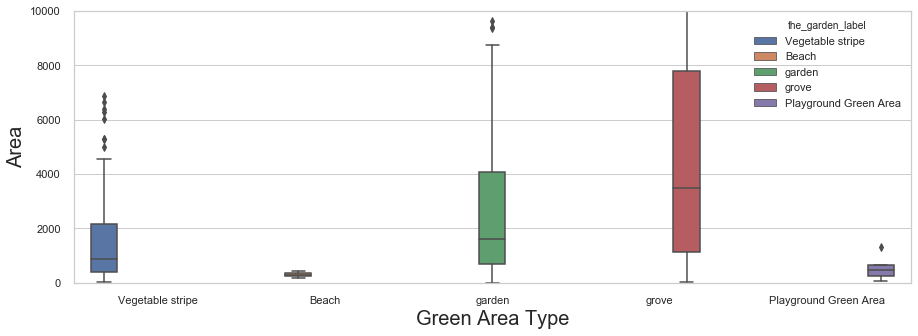

In [62]:
plt.figure(figsize=(15, 5))
green_box = sns.boxplot(x="the_garden_label",
                        y="area",
                        hue="the_garden_label", 
                        data=greens_df)

axes = green_box.axes
axes.set_ylabel("Area",fontsize=20)
axes.set_xlabel("Green Area Type",fontsize=20)
axes.set_ylim(0, 10000)
plt.savefig('green_area_type_box.png')

**Visualizing  the Data**

In order to visualize the data in folium I first will build a standard [GeoJSON](https://geojson.org/) object to pass to folium

In [63]:
def make_geo_json_record(df_row):
    """This Function creates a feature record (for a jeo-json file) with 'Polygon' geometry type from a row of greens_df"""

    result = f'''
    {{
      "type": "Feature",
      "geometry": {{
        "type": "Polygon",
        "coordinates": {df_row.coordinates} 
      }},
      "properties": {{
        "system_id": "{df_row.system_id}"
      }}
    }}
    '''
    return result

In [64]:
# Create a GeoJSON object from the greens_df
green_geo_json = json.loads(f'''{{
  "type": "FeatureCollection",
  "features": [
  {','.join([make_geo_json_record(df_row) for _, df_row in greens_df.iterrows()])}
  ]
}}''')

In [65]:
print('Public Green Areas')
print('Note that "Traffic island" and "Temporary grove" were filtered out')

greens_map = folium.Map([TA_LATITUDE, TA_LONGITUDE], tiles='cartodbpositron', zoom_start=12)

folium.GeoJson(
    green_geo_json,
    style_function=lambda x: {'color': '#008000'}  # green
).add_to(greens_map)

for _, school in school_df.iterrows():
    folium.Marker(location=[school.latitude, school.longitude],
                popup=school.system_id + ' - ' + school.institution_name,

                  icon=folium.Icon(icon='home', icon_color='purple', icon_size=(1, 1))).add_to(greens_map)
    
greens_map.save('greens_map.html')
HTML(greens_map._repr_html_())

Public Green Areas
Note that "Traffic island" and "Temporary grove" were filtered out


Note: Unfortunately the folium maps do not render on GitHub.
drop the github link to this .ipynb file into [nbviewer.jupyter.org](https://nbviewer.jupyter.org/) and get a full dynamic output

#### Matching nearby locations (for each school and green area)

In [66]:
def distance_point_from_polygon(point, polygon):
    '''return the geodesic distance (in kilometers) between the two nearest points of geometries inputs'''
    if point.within(polygon):
        return 0  # the point is inside the polygon
    point1, point2 = nearest_points(point, polygon)
    return geodesic(*point1.coords, *point2.coords).kilometers

In [67]:
radius_in_kilometers = 0.5
green_records = [] #
GreenNearSchool = namedtuple('GreenNearSchool',['school_id', 'location_id','location_type', 'distance', 'area'])
green_area_counter = Counter()  # to sum the total area of all the green areas that start within radius_in_kilometers
for _, school_row in school_df.iterrows():
    for _, greens_row in greens_df.iterrows():
        distance = distance_point_from_polygon(school_row.points, greens_row.polygons)
        if distance > radius_in_kilometers:
            continue  # matching only near locations (in the radius_in_kilometers)
        green_area_counter[school_row.system_id] += greens_row.area 
        green_records.append(
            GreenNearSchool(school_row.system_id,
                            greens_row.system_id, 
                            greens_row.the_garden_label,
                            distance,
                            greens_row.area
                           ))
    if school_row.system_id not in green_area_counter:
        green_area_counter[school_row.system_id] = 0  # the school have no near by green area

In [68]:
# the total area in m^2 of all the green areas that start within 0.5 kilometers for school
green_area_counter.most_common() 

[('599-306010', 351854.21),
 ('599-304030', 270624.33),
 ('599-300490', 258827.36000000004),
 ('599-300310', 229716.23000000004),
 ('599-301220', 169984.71),
 ('599-302470', 164948.64),
 ('599-301300', 133291.67),
 ('599-301710', 128109.47),
 ('599-314680', 108880.02000000002),
 ('599-316410', 99083.63999999998),
 ('599-302210', 93008.94),
 ('599-316090', 91929.14),
 ('599-300230', 91212.78),
 ('599-311120', 90396.88),
 ('599-302130', 81924.04),
 ('599-316580', 81068.12999999999),
 ('599-300070', 81061.95999999998),
 ('599-303040', 78406.41),
 ('599-305020', 69844.02999999998),
 ('599-316170', 68448.58),
 ('599-302050', 65974.46999999999),
 ('599-301480', 61964.43),
 ('599-318230', 60389.19),
 ('599-305510', 58757.770000000004),
 ('599-301060', 57747.93),
 ('599-303380', 55394.46000000001),
 ('599-315180', 53667.06),
 ('599-319140', 53584.96),
 ('599-912070', 49457.04999999999),
 ('599-310050', 47684.85),
 ('599-319060', 47047.259999999995),
 ('599-308170', 42624.14000000001),
 ('599-3

In [69]:
NearSchoolGreenArea = namedtuple('NearSchoolGreenArea', ['system_id', 'green_area'])
records = [NearSchoolGreenArea(school_id, area) for school_id, area in green_area_counter.items()]
# Adding the total green area near schoos to the schools dataframe
school_df = school_df.merge(pd.DataFrame(records), on='system_id')
school_df.head()

system_id institution_name  longitude   latitude  \
0  599-300070              ארן  34.790260  32.108128   
1  599-300150            ארנון  34.784813  32.088542   
2  599-300230        צוקי אביב  34.794272  32.125635   
3  599-300310       כוכב הצפון  34.786380  32.101471   
4  599-300490       יהודה מכבי  34.784702  32.092574   

                                        points  \
0    POINT (34.790259756694 32.10812820184408)   
1   POINT (34.7848129994323 32.08854244352671)   
2  POINT (34.79427209646924 32.12563548292588)   
3  POINT (34.78637968904724 32.10147101961964)   
4   POINT (34.78470188636309 32.0925735999618)   

                                school_address  green_area  
0    Yehuda Burla St 25, Tel Aviv-Yafo, Israel    81061.96  
1    David Yellin St 11, Tel Aviv-Yafo, Israel    24533.94  
2  Yair Rozenblum St 11, Tel Aviv-Yafo, Israel    91212.78  
3     Abba Kovner St 16, Tel Aviv-Yafo, Israel   229716.23  
4        Antigonus St 6, Tel Aviv-Yafo, Israel   258827.36

Creating a greens_near_school dataframe with all green areas near all the schools

In [70]:
greens_near_school = pd.DataFrame(green_records)
greens_near_school.head()

school_id location_id     location_type  distance      area
0  599-300070      842-52  Vegetable stripe  0.447407  25628.80
1  599-300070     842-240  Vegetable stripe  0.201248  21799.49
2  599-300070     842-253             grove  0.472367   2115.11
3  599-300070     842-257             grove  0.436130  18634.63
4  599-300070     842-952            garden  0.423339   2376.66

creating *greens_near_school_msg* a function for reporting all the green areas near a school by school_id

In [71]:
def green_msg(green_row):
    """A details row for the report of the function 'greens_near_school', green_row: one row of greens_near_school data"""
    part1 = f'{green_row.location_id:7} (area of {green_row.area:,.1f} meters squared),'
    part2 = f' approximately {(green_row.distance * 1000):,.0f} meters from the school.'
    return part1 + part2 

In [72]:
green_msg(greens_near_school.iloc[0,:])  # school_id = 599-300070, row 0

'842-52  (area of 25,628.8 meters squared), approximately 447 meters from the school.'

In [73]:
def clean_green_type(green_type, rows_len):
    """helper function for adjusting the string of the green_type for plural form"""
    return green_type.title() + 's' if rows_len > 1 else green_type.title()


def greens_near_school_msg(school_id):
    """a function for reporting all the green areas near a school by school_id"""
    msg_lines = []
    near_school = greens_near_school.loc[greens_near_school.school_id == school_id, :]
    areas = near_school.shape[0]
    total_area = f'{round(green_area_counter[school_id], 0):,.0f}'
    areas_str = 'Areas' if areas > 1 else 'Area'
    msg_lines.append(f'The School has {areas} nearby Green {areas_str} (with total area of {total_area} meters squared):')
    msg_lines.append(' ')
    for location_type, rows_index in near_school.groupby(near_school.location_type).groups.items():
        rows_len = len(rows_index)
        location_str = clean_green_type(location_type, rows_len)
        msg_lines.append(f'  The School has {rows_len} nearby {clean_green_type(location_type, rows_len)}:')
        df = near_school.loc[rows_index, :]
        for i, (_, row) in enumerate(df.iterrows(), start=1):
            msg_lines.append(f'    {i}. {green_msg(row)}')
        msg_lines.append(' ')
    return '\n'.join(msg_lines)

In [74]:
print('School 599-300070')
print('------------------')
print(greens_near_school_msg('599-300070'))

School 599-300070
------------------
The School has 11 nearby Green Areas (with total area of 81,062 meters squared):
 
  The School has 6 nearby Vegetable Stripes:
    1. 842-52  (area of 25,628.8 meters squared), approximately 447 meters from the school.
    2. 842-240 (area of 21,799.5 meters squared), approximately 201 meters from the school.
    3. 842-954 (area of 648.8 meters squared), approximately 110 meters from the school.
    4. 842-955 (area of 1,810.2 meters squared), approximately 96 meters from the school.
    5. 842-957 (area of 620.0 meters squared), approximately 315 meters from the school.
    6. 842-996 (area of 3,472.0 meters squared), approximately 361 meters from the school.
 
  The School has 1 nearby Garden:
    1. 842-952 (area of 2,376.7 meters squared), approximately 423 meters from the school.
 
  The School has 4 nearby Groves:
    1. 842-253 (area of 2,115.1 meters squared), approximately 472 meters from the school.
    2. 842-257 (area of 18,634.6 meter

### The Neighborhoods Data

In [75]:
neighborhood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   system_id            71 non-null     object
 1   neighborhood_number  71 non-null     int64 
 2   neighborhood_name    71 non-null     object
 3   coordinates          71 non-null     object
 4   polygons             71 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


I will use the neighborhoods data to match schools to neighborhoods (each school is in only one neighborhood).
I will then incorporate a measure of age distribution (that is available for neighborhoods) to the schools data.

**Match schools to neighborhoods**

In [76]:
NeighbourhoodMatch = namedtuple('NeighbourhoodMatch',['school_id', 'neighbourhood_id', 'neighborhood_number'])
records = []
for _, school_row in school_df.iterrows():
    school_id = school_row.system_id
    point = school_row.points
    for _, neighborhood_row in neighborhood_df.iterrows():
        if point.within(neighborhood_row['polygons']):
            records.append(NeighbourhoodMatch(school_id,
                                              neighborhood_row.system_id,
                                              neighborhood_row.neighborhood_number))
            print(f'School {school_id} is located in neighborhood {neighborhood_row.system_id}')
            break  # only one neighborhood match
    else: # if no break - didnt found a match
        print(f'No Match for {school_id}')
        
school_neighbourhood_match = pd.DataFrame(records)

School 599-300070 is located in neighborhood 511-10
School 599-300150 is located in neighborhood 511-25
School 599-300230 is located in neighborhood 511-2
School 599-300310 is located in neighborhood 511-5
School 599-300490 is located in neighborhood 511-22
School 599-300560 is located in neighborhood 511-13
School 599-300640 is located in neighborhood 511-9
School 599-300720 is located in neighborhood 511-33
School 599-300800 is located in neighborhood 511-31
School 599-300980 is located in neighborhood 511-23
School 599-301060 is located in neighborhood 511-7
School 599-301220 is located in neighborhood 511-6
School 599-301300 is located in neighborhood 511-6
School 599-301480 is located in neighborhood 511-3
School 599-301550 is located in neighborhood 511-31
School 599-301630 is located in neighborhood 511-24
School 599-301710 is located in neighborhood 511-3
School 599-301900 is located in neighborhood 511-68
School 599-302050 is located in neighborhood 511-16
School 599-302130 is

In [77]:
school_neighbourhood_match.head()

school_id neighbourhood_id  neighborhood_number
0  599-300070           511-10                    5
1  599-300150           511-25                   34
2  599-300230            511-2                    2
3  599-300310            511-5                    6
4  599-300490           511-22                   33

**Add neighbourhood_id to the School DataFrame**

In [78]:
school_df.rename({'system_id': 'school_id'}, axis=1, inplace=True)

In [79]:
school_df = school_df.merge(school_neighbourhood_match, on='school_id', how='left')
school_df.head()

school_id institution_name  longitude   latitude  \
0  599-300070              ארן  34.790260  32.108128   
1  599-300150            ארנון  34.784813  32.088542   
2  599-300230        צוקי אביב  34.794272  32.125635   
3  599-300310       כוכב הצפון  34.786380  32.101471   
4  599-300490       יהודה מכבי  34.784702  32.092574   

                                        points  \
0    POINT (34.790259756694 32.10812820184408)   
1   POINT (34.7848129994323 32.08854244352671)   
2  POINT (34.79427209646924 32.12563548292588)   
3  POINT (34.78637968904724 32.10147101961964)   
4   POINT (34.78470188636309 32.0925735999618)   

                                school_address  green_area neighbourhood_id  \
0    Yehuda Burla St 25, Tel Aviv-Yafo, Israel    81061.96           511-10   
1    David Yellin St 11, Tel Aviv-Yafo, Israel    24533.94           511-25   
2  Yair Rozenblum St 11, Tel Aviv-Yafo, Israel    91212.78            511-2   
3     Abba Kovner St 16, Tel Aviv-Yafo, Israel   229716.23            511-5   
4        Antigonus St 6, Tel Aviv-Yafo, Israel   258827.36           511-22   

   neighborhood_number  
0                    5  
1                   34  
2                    2  
3                    6  
4                   33

**Incorporate the population distribution by neighborhoods data**

In [80]:
pop_df.head()

neighborhood_number  neighborhood_name                        heb_name  \
0                   1             Glilot                          גלילות   
1            1-2-2003            Sde Dov  גלילות, צוקי אביב ואזור שדה דב   
2                  10         Ramat Aviv                        רמת-אביב   
3                  11         University                  אוניברסיטת ת"א   
4                  12  Convention Center                    מרכז הירידים   

   pop_total  pop_over_65  pop_45_64  pop_35_44  pop_25_34  pop_15_24  \
0          0            0          0          0          0          0   
1       5887         1218       1346        898        618        473   
2      10147         1545       1504       1230       2400       1923   
3          0            0          0          0          0          0   
4          0            0          0          0          0          0   

   pop_0_14                          updated  young_pop_0_34  \
0         0 2020-03-16 18:01:50.066000+00:00               0   
1      1334 2020-03-16 18:01:50.066000+00:00            2425   
2      1545 2020-03-16 18:01:50.066000+00:00            5868   
3         0 2020-03-16 18:01:50.066000+00:00               0   
4         0 2020-03-16 18:01:50.066000+00:00               0   

   percent of ages 0-34 from total_pop  
0                             0.000000  
1                             0.411925  
2                             0.578299  
3                             0.000000  
4                             0.000000

Some rows have more then one neighborhoods:

In [81]:
pop_df[pop_df.neighborhood_number.str.contains('-')]

neighborhood_number       neighborhood_name  \
1             1-2-2003                 Sde Dov   
7             14-15-16  Tel-Baruch & Maoz Aviv   
30               35-36       New North - South   

                                  heb_name  pop_total  pop_over_65  pop_45_64  \
1           גלילות, צוקי אביב ואזור שדה דב       5887         1218       1346   
7         תל ברוך צפון, תל ברוך ומעוז אביב       9147         1311       2123   
30  הצפון החדש - החלק הדרומי וצמרות איילון          0            0          0   

    pop_35_44  pop_25_34  pop_15_24  pop_0_14  \
1         898        618        473      1334   
7        1398        759       1131      2425   
30          0          0          0         0   

                            updated  young_pop_0_34  \
1  2020-03-16 18:01:50.066000+00:00            2425   
7  2020-03-16 18:01:50.066000+00:00            4315   
30 2020-03-16 18:01:50.066000+00:00               0   

    percent of ages 0-34 from total_pop  
1                              0.411925  
7                              0.471739  
30                             0.000000

In [82]:
pop_df['num_list'] = pop_df.neighborhood_number.str.split('-') # add column with a list of the neighborhoods numbers

make a record for each neighborhood

In [83]:
YoungPop = namedtuple('YoungPop', ['neighborhood_number', 'young_rate'])
records = []
for _, df_row in pop_df.iterrows():
    for neighborhood_number in df_row['num_list']:  # neighborhood_number is a string not an int
        if len(neighborhood_number) > 3 and neighborhood_number[1:3] == '00':  # to fix 2003 to 3 
            neighborhood_number = neighborhood_number[-1]
        records.append(YoungPop(int(neighborhood_number), df_row['percent of ages 0-34 from total_pop']))

In [84]:
neighborhood_youngs_rate = pd.DataFrame(records)
neighborhood_youngs_rate.sort_values('young_rate', axis=0, ascending=False, inplace=True)
# get rid of the duplicated data
neighborhood_youngs_rate = neighborhood_youngs_rate.loc[~neighborhood_youngs_rate.neighborhood_number.duplicated(),:]
# merge to neighborhood_df
neighborhood_df = neighborhood_df.merge(neighborhood_youngs_rate, how='left', on='neighborhood_number')

In [85]:
# After the merge make sure there is no duplicated
assert neighborhood_df.system_id.duplicated().sum() == 0
assert neighborhood_df.neighborhood_number.duplicated().sum() == 0

In [86]:
neighborhood_to_merge = neighborhood_df.loc[:,['neighborhood_number', 'young_rate']]
# merge the young_rate to the school data:
school_df = school_df.merge(neighborhood_to_merge, how='left', on='neighborhood_number')

In [87]:
school_df.head()

school_id institution_name  longitude   latitude  \
0  599-300070              ארן  34.790260  32.108128   
1  599-300150            ארנון  34.784813  32.088542   
2  599-300230        צוקי אביב  34.794272  32.125635   
3  599-300310       כוכב הצפון  34.786380  32.101471   
4  599-300490       יהודה מכבי  34.784702  32.092574   

                                        points  \
0    POINT (34.790259756694 32.10812820184408)   
1   POINT (34.7848129994323 32.08854244352671)   
2  POINT (34.79427209646924 32.12563548292588)   
3  POINT (34.78637968904724 32.10147101961964)   
4   POINT (34.78470188636309 32.0925735999618)   

                                school_address  green_area neighbourhood_id  \
0    Yehuda Burla St 25, Tel Aviv-Yafo, Israel    81061.96           511-10   
1    David Yellin St 11, Tel Aviv-Yafo, Israel    24533.94           511-25   
2  Yair Rozenblum St 11, Tel Aviv-Yafo, Israel    91212.78            511-2   
3     Abba Kovner St 16, Tel Aviv-Yafo, Israel   229716.23            511-5   
4        Antigonus St 6, Tel Aviv-Yafo, Israel   258827.36           511-22   

   neighborhood_number  young_rate  
0                    5    0.427894  
1                   34    0.470126  
2                    2    0.411925  
3                    6    0.438956  
4                   33    0.500461

In [88]:
school_df.school_id.duplicated().sum() == 0

True

**create school to exclude list** - to filter out schools that are in neighborhoods with no population (under the age of 34)

In [89]:
schools_to_exclude = school_df.loc[school_df.young_rate <= 0, 'school_id'].to_list()
schools_to_exclude

['599-310050']

In [90]:
school_df.loc[school_df.school_id == schools_to_exclude[0]]

school_id institution_name  longitude   latitude  \
37  599-310050              טבע  34.769731  32.048269   

                                         points  \
37  POINT (34.76973054452964 32.04826921834465)   

                         school_address  green_area neighbourhood_id  \
37  Herzl St 155, Tel Aviv-Yafo, Israel    47684.85           511-62   

    neighborhood_number  young_rate  
37                   55         0.0

I will fiter the above data before the modeling process

**Create a neighborhoods [GeoJSON](https://geojson.org/) object for folium visualization**

In [91]:
def make_neighborhood_geo_json_record(df_row):
    '''This Function creates a feature record (for a jeo-json file) with 'Polygon' geometry type from neighborhood_df row'''

    result = f'''
    {{
      "type": "Feature",
      "geometry": {{
        "type": "Polygon",
        "coordinates": {df_row.coordinates} 
      }},
      "properties": {{
        "neighborhood_number": {df_row.neighborhood_number}
      }}
    }}
    '''
    return result

neighborhoods_geo_json = json.loads(f'''{{
  "type": "FeatureCollection",
  "features": [
  {','.join([make_neighborhood_geo_json_record(df_row) for _, df_row in neighborhood_df.iterrows()])}
  ]
}}''')

In [92]:
tel_aviv_map = folium.Map([TA_LATITUDE, TA_LONGITUDE], tiles='cartodbpositron', zoom_start=12)

folium.Choropleth(
    geo_data=neighborhoods_geo_json,
    data=neighborhood_df,
    columns=['neighborhood_number', 'young_rate'],
    key_on='feature.properties.neighborhood_number',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Rate of ages 0-34 in the neighborhood',
    
).add_to(tel_aviv_map)

for _, df_row in school_df.iterrows():
    folium.Marker(
        location=[df_row.latitude, df_row.longitude],
        popup=df_row.school_id + ', ' + df_row.institution_name,
        icon=folium.Icon(icon='home', icon_size=(3, 3), icon_color='orange')).add_to(tel_aviv_map)

tel_aviv_map.save('neighborhoods_choropleth.html')
HTML(tel_aviv_map._repr_html_())

Note: Unfortunately the folium maps do not render on GitHub.
drop the github link to this .ipynb file into [nbviewer.jupyter.org](https://nbviewer.jupyter.org/) and get a full dynamic output

Now that I have paired schools with neighborhoods, I will write a function that returns the string with the school id., the neighborhood it resides in and the school address. I will use this function later, when making a report for the highlighted schools (see later).

In [93]:
def school_location_info(school_id):
    """returns the string with the school id., the neighborhood it resides in and the school address"""
    row = school_df.loc[school_df.school_id == school_id, :]
    msg = f'School: {school_id}, In Neighborhood: {row.neighbourhood_id.values[0]}, Address: {row.school_address.values[0]}.'
    return msg

In [94]:
for school_id in school_df.school_id:
    print('_' * 112)
    print(school_location_info(school_id))

________________________________________________________________________________________________________________
School: 599-300070, In Neighborhood: 511-10, Address: Yehuda Burla St 25, Tel Aviv-Yafo, Israel.
________________________________________________________________________________________________________________
School: 599-300150, In Neighborhood: 511-25, Address: David Yellin St 11, Tel Aviv-Yafo, Israel.
________________________________________________________________________________________________________________
School: 599-300230, In Neighborhood: 511-2, Address: Yair Rozenblum St 11, Tel Aviv-Yafo, Israel.
________________________________________________________________________________________________________________
School: 599-300310, In Neighborhood: 511-5, Address: Abba Kovner St 16, Tel Aviv-Yafo, Israel.
________________________________________________________________________________________________________________
School: 599-300490, In Neighborhood: 511-22, Add

### The *Dog Gardens*, *kindergartens* & *Daycares* Data

In [95]:
doggarden_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 91
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   system_id      88 non-null     object 
 1   garden_number  76 non-null     float64
 2   longitude      88 non-null     float64
 3   latitude       88 non-null     float64
 4   points         88 non-null     object 
dtypes: float64(3), object(2)
memory usage: 4.1+ KB


In [96]:
kindergarten_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 642
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   system_id         419 non-null    object 
 1   institution_name  419 non-null    object 
 2   longitude         419 non-null    float64
 3   latitude          419 non-null    float64
 4   points            419 non-null    object 
dtypes: float64(2), object(3)
memory usage: 19.6+ KB


In [97]:
daycare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   system_id   87 non-null     object 
 1   frame_name  87 non-null     object 
 2   longitude   87 non-null     float64
 3   latitude    87 non-null     float64
 4   points      87 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.5+ KB


**Calculate the distance (in kilometers) between each school and the locations in *Dog Gardens*, *kindergartens* & *Daycares* data. and add the near locations (500 meters) to a new dataframe *near_school_df***

In [98]:
def distance_between_two_points(point1, point2):
    '''return the geodesic distance (in kilometers) between two geometries of type Point'''
    return geodesic(*point1.coords, *point2.coords).kilometers

In [99]:
# remember: radius_in_kilometers = 0.5 
NearSchool = namedtuple('NearSchool', ['school_id', 'location_id','location_type', 'distance'])

def make_near_school_records(schools=school_df,
                        max_radius=radius_in_kilometers,
                        list_of_dataframes=[doggarden_df, kindergarten_df, daycare_df]):
    """Returns a list of NearSchool records ('school_id', 'location_id','location_type', 'distance')
        schools: the schools data
        max_radius: the max radius in kilometers that is considered near
        list_of_dataframes: a list of dataframes with locations 
        for each school: for each location in list_of_dataframes, if the distance between the school and the location is 
        less than or equal to the max_radius then a record will be appended to the records list that will be returnd.
    """
    location_type_map = {'586': 'dog_garden', '598': 'kindergarten', '624': 'daycare'}
    records = []
    for _, school_row in schools.iterrows():
        school_id = school_row.school_id
        point = school_row.points
        for df in list_of_dataframes:
            for _, df_row in df.iterrows():
                location_type = location_type_map[df_row.system_id.split('-')[0]]
                distance = distance_between_two_points(point, df_row.points)
                if distance <= radius_in_kilometers:  # matching only near locations (in the radius_in_kilometers)
                    records.append(NearSchool(school_id, df_row.system_id, location_type, distance))   
    return records

In [100]:
near_school_df = pd.DataFrame(make_near_school_records())

In [101]:
near_school_df.head()

school_id location_id location_type  distance
0  599-300070      586-21    dog_garden  0.457003
1  599-300070   598-31111  kindergarten  0.344343
2  599-300070   598-31112  kindergarten  0.344343
3  599-300070   598-31113  kindergarten  0.344343
4  599-300070  598-153131  kindergarten  0.379458

In [102]:
near_school_df.loc[:,['school_id', 'location_type']].groupby('location_type').count().sort_values(
    'school_id', axis=0,ascending=False).rename({'school_id': 'Count'}, axis=1)

Count
location_type       
kindergarten     483
daycare           98
dog_garden        91

In [103]:
def get_location(location_id, location_df, location_id_name):
    """Returns a tuple of latitude and longitude of location id. from the location_df. 
    The location_id_name is the column name that identifies the location id."""
    row = location_df.loc[location_df[location_id_name] == location_id, ['longitude', 'latitude']]
    return row.latitude, row.longitude


def make_legend_row(loc_name, fa_icon, icon_color):
    """A function to create a row of a legend for a location type
    loc_name: a location name to present in the legend.
    fa_icon: the icon that will be used in the legend row
    icon_color: the icon color."""
    return f'&nbsp; {loc_name} &nbsp; <i class="fa {fa_icon} fa-2x" style="color:{icon_color}"></i><br>'


def make_html_legend(venue_type_list):
    """A function to create an HTML legend for map visualizations."""
    html = f'''<div style="position: fixed; 
                bottom: 50px; left: 50px; width: 155px; height: {43 * len(venue_type_list)}px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                ">&nbsp; Locations: <br>
                {"""
                """.join([vis_map[venue]['html_legend']() for venue in venue_type_list])}
            </div>
    '''
    return html

# visualization_map - A dictionary of defenitions for helping to easily create map visualizations. 
# I will update this dictionary later as I add more data and visualizations. 
vis_map = {
    'dog_garden': {
        'data': doggarden_df,
        'location': lambda location_id: get_location(location_id, doggarden_df, 'system_id'),
        'icon': lambda: folium.Icon(icon='paw', color='green', prefix='fa'),
        'popup': lambda df_row: str(df_row.system_id) + ' - Dog Garden',
        'html_legend': lambda: make_legend_row('Dog Garden', 'fa-paw',  'green')
    },
    'kindergarten': {
        'data': kindergarten_df,
        'location': lambda location_id: get_location(location_id, kindergarten_df, 'system_id'),
        'icon': lambda: folium.Icon(icon='child', color='red', prefix='fa'),
        'popup': lambda df_row: str(df_row.system_id) + ' - Kindergarten',
        'html_legend': lambda: make_legend_row('Kindergarten', 'fa-child', 'red')
    },
    'daycare': {
        'data': daycare_df,
        'location': lambda location_id: get_location(location_id, daycare_df, 'system_id'),
        'icon': lambda: folium.Icon(icon='puzzle-piece', color='pink', prefix='fa'),
        'popup': lambda df_row: str(df_row.system_id) + ' - Daycare',
        'html_legend': lambda: make_legend_row('Daycare', 'fa-puzzle-piece', 'pink')
    }
}


In [104]:
tel_aviv_map = folium.Map([TA_LATITUDE, TA_LONGITUDE], tiles='Stamen Terrain', zoom_start=12)

for location in vis_map:
    for _, row in vis_map[location]['data'].iterrows():
        folium.Marker(
            location=[row.latitude, row.longitude],
            popup=vis_map[location]['popup'](row),
            icon=vis_map[location]['icon']()).add_to(tel_aviv_map)
        
html_legend = make_html_legend(['kindergarten', 'daycare', 'dog_garden'])
tel_aviv_map.get_root().html.add_child(folium.Element(html_legend))

tel_aviv_map.save('all_kindergarten_daycare_dog_garden_map.html')
HTML(tel_aviv_map._repr_html_())

Note: Unfortunately the folium maps do not render on GitHub.
drop the github link to this .ipynb file into [nbviewer.jupyter.org](https://nbviewer.jupyter.org/) and get a full dynamic output

creating *venues_near_school_msg* a function for reporting all the daycare, dog gardens & kindergartens near a school by school_id

In [105]:
def venue_msg(venue_row):
    """A details row for the report of the function 'venues_near_school_msg'
        venue_row: one row of near_school_df data"""
    return f'{venue_row.location_id:10} ,approximately {(venue_row.distance * 1000):,.0f} meters from the school.'

In [106]:
print(venue_msg(near_school_df.loc[0,:]))

586-21     ,approximately 457 meters from the school.


In [107]:
location_string = {
    'daycare': lambda rows_len: 'Daycares' if rows_len > 1 else 'Daycare',
    'dog_garden': lambda rows_len: 'Dog Gardens' if rows_len > 1 else 'Dog Garden',
    'kindergarten': lambda rows_len: 'Kindergartens' if rows_len > 1 else 'Kindergarten'}

def venues_near_school_msg(school_id, df=near_school_df):
    """function for reporting all the daycare, dog gardens & kindergartens near a school by school_id"""
    df = df.loc[df.school_id == school_id, :].copy()
    df = df.loc[df.location_type.isin(['daycare', 'dog_garden', 'kindergarten']), :]
    msg_lines = []
    for location_type, rows_index in df.groupby(df.location_type).groups.items():
        rows_len = len(rows_index)
        location_str = location_string[location_type](rows_len)
        msg_lines.append(f'The School has {rows_len} nearby {location_str}:')
        sub_df = df.loc[rows_index, :]
        for i, (_, row) in enumerate(sub_df.iterrows(), start=1):
            msg_lines.append(f'  {i}. {venue_msg(row)}')
        msg_lines.append(' ')
        
    return '\n'.join(msg_lines)

In [108]:
print(school_location_info('599-300070'))
print('-' * 112) 
print(venues_near_school_msg('599-300070'))

School: 599-300070, In Neighborhood: 511-10, Address: Yehuda Burla St 25, Tel Aviv-Yafo, Israel.
----------------------------------------------------------------------------------------------------------------
The School has 1 nearby Daycare:
  1. 624-16     ,approximately 344 meters from the school.
 
The School has 1 nearby Dog Garden:
  1. 586-21     ,approximately 457 meters from the school.
 
The School has 8 nearby Kindergartens:
  1. 598-31111  ,approximately 344 meters from the school.
  2. 598-31112  ,approximately 344 meters from the school.
  3. 598-31113  ,approximately 344 meters from the school.
  4. 598-153131 ,approximately 379 meters from the school.
  5. 598-153132 ,approximately 379 meters from the school.
  6. 598-182181 ,approximately 270 meters from the school.
  7. 598-182182 ,approximately 270 meters from the school.
  8. 598-226161 ,approximately 0 meters from the school.
 


### The Playground Data

In [109]:
playground_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 381
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   site_code               66 non-null     int64  
 1   longitude               66 non-null     float64
 2   latitude                66 non-null     float64
 3   site_type               66 non-null     object 
 4   a_number_of_facilities  66 non-null     float64
 5   points                  66 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 3.6+ KB


Creating a *system_id* column for consistency with the others dataframes

In [110]:
playground_df.insert(0, 'system_id', '696-' + playground_df.site_code.astype(str))

In [111]:
playground_df.site_type.unique()

array(['garden', 'A garden', '', 'grove', 'Playground',
       'Vegetable stripe', 'Playground in the woods'], dtype=object)

In [112]:
playground_df.site_type.replace({'A garden': 'garden', '': 'Playground'}, inplace=True)  # fixing site types

In [113]:
# Add 'Playground in a ' to site type to avoid confusion with green areas data
playground_df.site_type = playground_df.site_type.apply(
    lambda play_type: f'Playground in a {play_type.lower()}' if not play_type.startswith('Playground') else play_type)

In [114]:
playground_df.site_type.unique()

array(['Playground in a garden', 'Playground', 'Playground in a grove',
       'Playground in a vegetable stripe', 'Playground in the woods'],
      dtype=object)

In [115]:
playground_df[['a_number_of_facilities']].describe()

a_number_of_facilities
count               66.000000
mean                 6.348485
std                  4.200705
min                  1.000000
25%                  3.000000
50%                  5.000000
75%                  9.000000
max                 21.000000

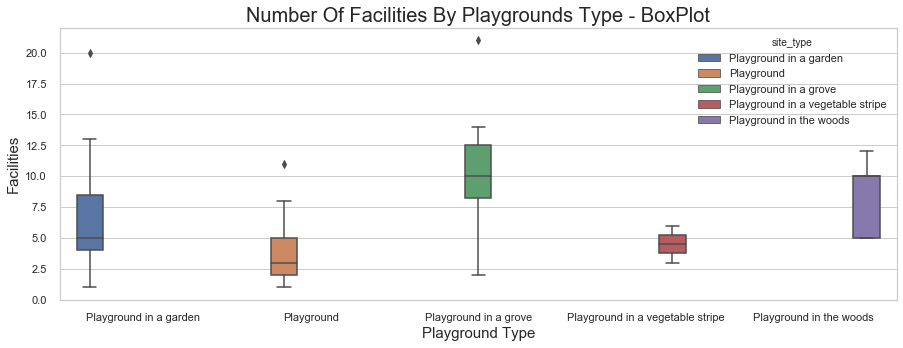

In [116]:
plt.figure(figsize=(15, 5))
playgrounds_box = sns.boxplot(x="site_type",
                        y="a_number_of_facilities",
                        hue="site_type", 
                        data=playground_df)

axes = playgrounds_box.axes
axes.set_ylabel("Facilities",fontsize=15)
axes.set_xlabel("Playground Type",fontsize=15)
axes.set_xlabel("Playground Type",fontsize=15)
axes.set_title('Number Of Facilities By Playgrounds Type - BoxPlot', fontsize=20)
plt.savefig('playgrounds_facilities_box.png')

The Playground Type doesn't really matter but the number of facilities dose.

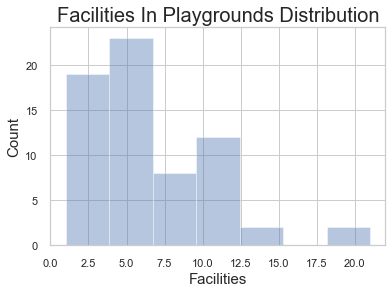

In [117]:
facilities_distplot = sns.distplot(playground_df.a_number_of_facilities, kde=False)
axes = facilities_distplot.axes
axes.set_ylabel("Count",fontsize=15)
axes.set_xlabel("Facilities",fontsize=15)
axes.set_title('Facilities In Playgrounds Distribution', fontsize=20)
plt.savefig('playgrounds_facilities_distribution.png')

In [118]:
vis_map.update({
    'playground': {
        'data': playground_df,
        'location': lambda location_id: get_location(location_id, playground_df, 'system_id'),
        'icon': lambda: folium.Icon(icon='futbol-o', color='blue', prefix='fa'),
        'popup': lambda df_row: df_row.system_id + ' - ' + df_row.site_type,
        'html_legend': lambda: make_legend_row('Playground', 'fa-futbol-o', 'blue'),
    },
    'school': {
        'data': school_df,
        'location': lambda location_id: get_location(location_id, school_df, 'school_id'),
        'icon': lambda: folium.Icon(icon='home', icon_color='orange', color='purple'),
        'popup': lambda df_row: df_row.school_id + ' - ' + df_row.institution_name,
        'html_legend': lambda: make_legend_row('The School', 'fa-home', 'orange')
    }
})

In [119]:
tel_aviv_map = folium.Map([TA_LATITUDE, TA_LONGITUDE], tiles='Stamen Terrain', zoom_start=12)

for location in ['school', 'playground']:
    for _, row in vis_map[location]['data'].iterrows():
        folium.Marker(
            location=[row.latitude, row.longitude],
            popup=vis_map[location]['popup'](row),
            icon=vis_map[location]['icon']()).add_to(tel_aviv_map)
        
html_legend = make_html_legend(['school', 'playground'])
tel_aviv_map.get_root().html.add_child(folium.Element(html_legend))

tel_aviv_map.save('all_playgrounds_and_schools_map.html')
HTML(tel_aviv_map._repr_html_())

Note: Unfortunately the folium maps do not render on GitHub.
drop the github link to this .ipynb file into [nbviewer.jupyter.org](https://nbviewer.jupyter.org/) and get a full dynamic output

So, for each school,  I will sum the number of all facilities that are close by (500 meters)

In [120]:
play_counter = Counter()
playNearSchool = namedtuple('playNearSchool', ['school_id', 'location_id','location_type', 'distance', 'facilities'])
play_records = []
for _, school_row in school_df.iterrows():
    for _, playground_row in playground_df.iterrows():
        distance = distance_between_two_points(school_row.points, playground_row.points)
        if distance > radius_in_kilometers:
            continue  # only count playgrounds facilities near the school
        play_records.append(playNearSchool(school_row.school_id,
                                           playground_row.system_id,
                                           playground_row.site_type,
                                           distance,
                                           playground_row.a_number_of_facilities))
        play_counter[school_row.school_id] += playground_row.a_number_of_facilities 
    if school_row.school_id not in play_counter:
        play_counter[school_row.school_id] = 0  # the school have no near by playgrounds that meet thr client needs

In [121]:
play_counter.most_common()

[('599-316580', 32.0),
 ('599-319060', 31.0),
 ('599-302210', 29.0),
 ('599-316170', 28.0),
 ('599-318230', 28.0),
 ('599-313020', 24.0),
 ('599-301220', 22.0),
 ('599-316410', 21.0),
 ('599-912070', 21.0),
 ('599-312110', 19.0),
 ('599-319140', 16.0),
 ('599-301710', 15.0),
 ('599-302050', 15.0),
 ('599-301300', 14.0),
 ('599-302470', 14.0),
 ('599-311120', 13.0),
 ('599-315000', 13.0),
 ('599-316090', 12.0),
 ('599-301480', 10.0),
 ('599-302130', 10.0),
 ('599-303040', 10.0),
 ('599-306010', 10.0),
 ('599-307000', 10.0),
 ('599-300230', 9.0),
 ('599-314680', 9.0),
 ('599-303120', 8.0),
 ('599-303380', 6.0),
 ('599-305510', 6.0),
 ('599-309650', 6.0),
 ('599-309730', 6.0),
 ('599-312520', 5.0),
 ('599-313440', 5.0),
 ('599-315180', 5.0),
 ('599-300490', 4.0),
 ('599-300980', 4.0),
 ('599-304030', 4.0),
 ('599-312370', 4.0),
 ('599-314010', 4.0),
 ('599-301900', 2.0),
 ('599-303200', 2.0),
 ('599-300720', 1.0),
 ('599-305100', 1.0),
 ('599-300070', 0),
 ('599-300150', 0),
 ('599-300310

**Add the number of all the playground facilities near each school to the Schools Data**

In [122]:
NearSchoolFacilities = namedtuple('NearSchoolFacilities', ['school_id', 'playground_facilities'])
records = [NearSchoolFacilities(school_id, facilities) for school_id, facilities in play_counter.items()]
# merge the playground_facilities to the school data:
school_df = school_df.merge(pd.DataFrame(records), on='school_id')

In [123]:
school_df.loc[:, ['school_id', 'playground_facilities']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   school_id              56 non-null     object 
 1   playground_facilities  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [124]:
playgrounds_near_school = pd.DataFrame(play_records)
playgrounds_near_school.head()

school_id location_id           location_type  distance  facilities
0  599-300230     696-255  Playground in a garden  0.314518         5.0
1  599-300230    696-3482  Playground in a garden  0.179343         4.0
2  599-300490      696-29  Playground in a garden  0.326204         4.0
3  599-300720    696-4265              Playground  0.349734         1.0
4  599-300980      696-29  Playground in a garden  0.419271         4.0

creating *playground_near_school_msg* a function for reporting all the playgrounds and facilities near a school by school_id

In [125]:
def playground_msg(play_row):
    """A details row for the report of the function 'playground_near_school_msg'
        play_row: one row of near_school_df data"""
    facilities = play_row.facilities
    facilities_Str = facilities_str = 'facilities' if facilities > 1 else 'facility'
    part1 = f'{play_row.location_id:8} ({play_row.location_type.lower()}, with {facilities:,.0f} {facilities_Str}),'
    part2 = f' approximately {(play_row.distance * 1000):,.0f} meters from the school.'
    return part1 + part2 

In [126]:
def playground_near_school_msg(school_id):
    """function for reporting all the playgrounds and facilities near a school by school_id"""
    msg_lines = []
    near_school = playgrounds_near_school.loc[playgrounds_near_school.school_id == school_id, :]
    facilities = play_counter[school_id]
    playgrounds = near_school.shape[0]
    facilities_str = 'facilities' if facilities > 1 else 'facility'
    playground_str = 'playgrounds' if playgrounds > 1 else 'playground'
    msg_lines.append(f'The School has {playgrounds} nearby {playground_str} (with {facilities:,.0f} {facilities_str}):')
    for i, (_, row) in enumerate(near_school.iterrows(), start=1):
        msg_lines.append(f'  {i}. {playground_msg(row)}')
    return '\n'.join(msg_lines) + '\n'

In [127]:
print(playground_msg(playgrounds_near_school.iloc[0,:]))

696-255  (playground in a garden, with 5 facilities), approximately 315 meters from the school.


In [128]:
print(school_location_info('599-300230'))
print('-' * 112)
print(playground_near_school_msg('599-300230'))

School: 599-300230, In Neighborhood: 511-2, Address: Yair Rozenblum St 11, Tel Aviv-Yafo, Israel.
----------------------------------------------------------------------------------------------------------------
The School has 2 nearby playgrounds (with 9 facilities):
  1. 696-255  (playground in a garden, with 5 facilities), approximately 315 meters from the school.
  2. 696-3482 (playground in a garden, with 4 facilities), approximately 179 meters from the school.



## Foursquare Places API

The [Places API](https://developer.foursquare.com/docs/api) offers real-time access to Foursquare’s global database of rich venue data and user content.


As this is part of the project requirements, this is the first source I explored, however, it contained hardly any data on schools and other educational venues in Tel Aviv. Therefore, I searched for the missing data in the abovementioned open TLV, while using Foursquare Places API for data on the other [venue categories](https://developer.foursquare.com/docs/resources/categories):

For the client’s family weekly tradition:
Ice cream shop (category id.: 4bf58dd8d48988d1c9941735) – I will group all venues that are returned under “ice cream”.
Pizza place (category id.: 4bf58dd8d48988d1ca941735) – I will group all venues that are returned under “pizza”.
For fun for parents – I will group all venues that are returned under both categories below under “parents’ fun”, apart from venues that the client has instructed me to ignore (e.g., restaurants, hotels – the full list will be detailed in the subcategories_to_exclude below):
Bar (category id.: 4bf58dd8d48988d116941735)
Pub (category id.: 4bf58dd8d48988d11b941735)
Client’s request not to live near strip clubs (category id.: 4bf58dd8d48988d1d6941735)

I will utilizing the Foursquare Places API [explore endpoint](https://developer.foursquare.com/docs/api/venues/explore) to find a list of the relevant venues near the each school location.

In [129]:
# Foursquare API Credentials
FOURSQUARE_CLIENT_ID = config['foursquare']['client_id']  # Foursquare ID
FOURSQUARE_CLIENT_SECRET = config['foursquare']['client_secret'] # Foursquare Secret

FOURSQUARE_VERSION = '20180605' # Foursquare API version
FOURSQUARE_LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius in meters (walking distance with kids)

Defining the venue categories to filter

In [130]:
VenuCategory = namedtuple('VenuCategory', 'category_Id category_name')

venus_filters = [
    # the client prefers the school to be near a:
        # for the family weekly tradition
     VenuCategory('4bf58dd8d48988d1c9941735', 'Ice Cream Shop'),  
     VenuCategory('4bf58dd8d48988d1ca941735', 'Pizza Place'),
        # for the parents, they what to go out not far away if the babysitter calls
     VenuCategory('4bf58dd8d48988d116941735', 'Bar'),
     VenuCategory('4bf58dd8d48988d11b941735', 'Pub'),
    #  the client asked for the school to be NOT near a:
     VenuCategory('4bf58dd8d48988d1d6941735', 'Strip Club'),  # the client whants to exclude schools that are near a Strip Club
]

# names of categories that are included in the venus result but are not desirable for the clients
# meaning that those categories can be ignored, unlike Strip Clubs that the clients explicitly asked not be near to.
subcategories_to_exclude={'Hookah Bar',
                          'Nightclub',
                          'Hotel',
                          'Coffee Shop',
                          'Gay Bar',
                          'Snack Place',
                          'Sandwich Place',
                          'Café', 
                          'Speakeasy',
                          'Restaurant',
                          'Mediterranean Restaurant',
                          'Hawaiian Restaurant',
                          'Juice Bar'}

**Getting the data**

In [131]:
def get_near_schools_venues(
    schools, latitudes, longitudes, categories, exclude_categories=subcategories_to_exclude, radius=500):
    """A function to requset and parse the data (for each school) from  foursquare"""
    
    base_url = 'https://api.foursquare.com/v2/venues/explore?&'
    url_string = base_url + 'client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'
    venues_list=[]
    for school, lat, lng in zip(schools, latitudes, longitudes):
        # create the API request URL
        url = url_string.format(
            FOURSQUARE_CLIENT_ID, 
            FOURSQUARE_CLIENT_SECRET, 
            FOURSQUARE_VERSION, 
            lat, 
            lng, 
            radius,
            str(categories),
            FOURSQUARE_LIMIT)
        
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            school,
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],
            venue['venue']['location']['distance'] ,  
            venue['venue']['categories'][0]['name']) 
            for venue in results 
            if  venue['venue']['categories'][0]['name'] not in exclude_categories])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
        'school_id', 
        'venue_name', 
        'latitude',   # venue latitude
        'longitude',  # venue longitude
        'distance',              
        'venue_category']
    
    return(nearby_venues)

In [132]:
try:  # get the saved data
    with open('schools_venues.pickle', 'rb') as f:
        schools_venues = pickle.load(f)
except FileNotFoundError:  # if there is no saved data
    schools_venues = get_near_schools_venues( # requset and parse the data (for each school) from  foursquare
        schools=school_df.school_id,
        latitudes=school_df.latitude,
        longitudes=school_df.longitude,
        categories=','.join([(category_id) for category_id, category_name in venus_filters]))

    # After the api request, save the data
    with open('schools_venues.Pickle', 'wb') as f:
            pickle.dump(schools_venues, f, pickle.HIGHEST_PROTOCOL)

In [133]:
schools_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school_id       524 non-null    object 
 1   venue_name      524 non-null    object 
 2   latitude        524 non-null    float64
 3   longitude       524 non-null    float64
 4   distance        524 non-null    int64  
 5   venue_category  524 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.7+ KB


Converting distance in meters to kilometers for consistency with other tabels

In [134]:
schools_venues.distance = schools_venues.distance / 1000

Adding a grouping of the data by location type

In [135]:
schools_venues.venue_category.unique()

array(['Strip Club', 'Ice Cream Shop', 'Pizza Place', 'Dessert Shop',
       'Bar', 'Pub', 'Wine Bar', 'Italian Restaurant', 'Cocktail Bar',
       'Brewery', 'Beer Bar', 'Whisky Bar', 'Karaoke Bar', 'Beer Garden',
       'Bakery', 'Sports Bar', 'Hotel Bar', 'Beach Bar', 'Diner',
       'Burger Joint', 'Bistro', 'Dive Bar'], dtype=object)

In [136]:
categories_map = defaultdict(lambda: 'parents_fun')
categories_map.update({
    'Ice Cream Shop': 'ice_cream',
    'Dessert Shop': 'ice_cream',
    'Bakery': 'ice_cream',            # the one venue is: "Bread, Cake & Ice Cream COMPANY"
    'Pizza Place': 'pizza',
    'Italian Restaurant': 'pizza',
    'Strip Club': 'school_excluding'  # school excluding categories, the clients explicitly asked not be near   
})


In [137]:
schools_venues['location_type'] = schools_venues.venue_category.map(categories_map)
print('schools_venues shape:',schools_venues.shape)
schools_venues.head()

schools_venues shape: (524, 7)


school_id                  venue_name   latitude  longitude  distance  \
0  599-300070               מועדון המרפסת  32.107547  34.793881     0.347   
1  599-300070                     Dr Leck  32.105355  34.792647     0.382   
2  599-300070           פיצה האט רמת אביב  32.105144  34.792459     0.391   
3  599-300070             פיצה האט אקספרס  32.106248  34.794508     0.451   
4  599-300070  Vaniglia - Ramat Aviv Mall  32.111225  34.794082     0.498   

   venue_category     location_type  
0      Strip Club  school_excluding  
1  Ice Cream Shop         ice_cream  
2     Pizza Place             pizza  
3     Pizza Place             pizza  
4  Ice Cream Shop         ice_cream

Add a unique *location_id*

In [138]:
schools_venues.insert(0, 'location_id', schools_venues.index)
schools_venues.head(3)

location_id   school_id         venue_name   latitude  longitude  distance  \
0            0  599-300070      מועדון המרפסת  32.107547  34.793881     0.347   
1            1  599-300070            Dr Leck  32.105355  34.792647     0.382   
2            2  599-300070  פיצה האט רמת אביב  32.105144  34.792459     0.391   

   venue_category     location_type  
0      Strip Club  school_excluding  
1  Ice Cream Shop         ice_cream  
2     Pizza Place             pizza

Examining Results

In [139]:
schools_venues[['school_id', 'location_type']].groupby('location_type').count().rename(
    {'school_id': 'Count'}, axis=1).sort_values(by='Count', ascending=False)

Count
location_type          
parents_fun         314
pizza               121
ice_cream            86
school_excluding      3

In [140]:
df = schools_venues.loc[:, ['school_id', 'location_type']].copy()
df['count'] = 1

pd.pivot_table(df, index='school_id', columns='location_type', aggfunc=np.sum, fill_value=0)

count                                   
location_type ice_cream parents_fun pizza school_excluding
school_id                                                 
599-300070            3           0     2                1
599-300150            3           3     4                0
599-300490            2           5     4                0
599-300560            0           0     0                1
599-300640            0           0     1                0
599-300720            4          23     5                0
599-300800            4          22     5                0
599-300980            3           3     4                0
599-301060            1           2     3                0
599-301220            0           0     3                0
599-301300            0           1     3                0
599-301480            3           0     3                0
599-301550            7          27     6                0
599-301630            1           7     0                0
599-301710            4           0     3                0
599-301900            0           1     0                0
599-302050            0           1     0                0
599-302130            1           0     3                0
599-302390            1           1     1                0
599-302470            2           1     2                0
599-303040            0           3     2                0
599-303120            1           0     0                0
599-303380            2           0     1                0
599-304030            3           6     3                0
599-305020            2          14     5                1
599-305100            4          17     6                0
599-305280            5          37     6                0
599-305510            7          35     8                0
599-306010            1           1     0                0
599-308170            6           8     5                0
599-309650            5          40     6                0
599-309730            1          13     3                0
599-311120            0           0     2                0
599-312110            0           0     1                0
599-312370            1           3     1                0
599-312520            6          14     1                0
599-313020            1           0     0                0
599-314010            1          20     4                0
599-314680            0           0     1                0
599-315000            0           1     2                0
599-315180            1           0     3                0
599-316090            0           1     0                0
599-316170            0           0     2                0
599-316410            0           0     1                0
599-316580            0           1     0                0
599-318230            0           1     3                0
599-319060            0           0     1                0
599-319140            0           1     0                0
599-912070            0           1     2                0

**Examining the schools to remove (near a strip clubs)**

In [141]:
schools_venues[schools_venues.location_type == 'school_excluding']

location_id   school_id         venue_name   latitude  longitude  \
0              0  599-300070      מועדון המרפסת  32.107547  34.793881   
27            27  599-300560         Iddo House  32.125346  34.830294   
223          223  599-305020  Pussycat (פוסיקט)  32.096427  34.774261   

     distance venue_category     location_type  
0       0.347     Strip Club  school_excluding  
27      0.465     Strip Club  school_excluding  
223     0.493     Strip Club  school_excluding

In [142]:
# Add to schools to exclude: exclude no population within 500 meters + exclude near a strip club
schools_to_exclude.extend(schools_venues[schools_venues.location_type == 'school_excluding']['school_id'].to_list())
schools_to_exclude

['599-310050', '599-300070', '599-300560', '599-305020']

Visualize the schools to exclude

In [143]:
def get_venue_location(location_id):
    """Return a tuple of the latitude and longitude of the location_id from the schools_venues dataframe"""
    row = schools_venues.loc[schools_venues['location_id'] == location_id, ['latitude', 'longitude']]
    return row.latitude, row.longitude

def venue_popup(row):
    """a function for creating a popup for folium visualization map from a row of the schools_venues df"""
    return row.location_type.replace('_', ' ') + ': ' + row.venue_category.replace('_', ' ')
    

vis_map.update({
    'school_excluding': {
        'data': schools_venues.loc[schools_venues.location_type == 'school_excluding', :],
        'location': get_venue_location, 
        'icon': lambda: folium.Icon(icon='remove-sign', icon_color='red', color='black'),
        'popup': venue_popup,
        'html_legend': lambda: make_legend_row('Excluding', 'fa-times', 'black'),
    },
    'ice_cream': {
        'data': schools_venues.loc[schools_venues.location_type == 'ice_cream', :],
        'location': get_venue_location,
        'icon': lambda: folium.Icon(icon='map-pin', color='black', prefix='fa'),
        'popup': venue_popup,
        'html_legend': lambda: make_legend_row('Ice-Cream', 'fa-map-pin', 'black')
    },
    'pizza': {
        'data': schools_venues.loc[schools_venues.location_type == 'pizza', :],
        'location': get_venue_location,
        'icon': lambda: folium.Icon(icon='cutlery', color='purple', prefix='fa'),
        'popup': venue_popup,
        'html_legend': lambda: make_legend_row('Pizza', 'fa-cutlery', 'purple')
    },
    'parents_fun': {
        'data': schools_venues.loc[schools_venues.location_type == 'parents_fun', :],
        'location': get_venue_location,
        'icon': lambda: folium.Icon(icon='glass', color='gray', prefix='fa'),
        'popup': venue_popup,
        'html_legend': lambda: make_legend_row('Parents Fun', 'fa-glass', 'gray')
    }
})

In [144]:
tel_aviv_map = folium.Map([TA_LATITUDE, TA_LONGITUDE], zoom_start=12)

# Add school_excluding markers for strip bar 
for _, row in vis_map['school_excluding']['data'].iterrows():
    folium.Marker(
        location=[row.latitude, row.longitude],
        popup=vis_map['school_excluding']['popup'](row),
        icon=vis_map['school_excluding']['icon']()).add_to(tel_aviv_map)

# add schools markers for schools to exclude
for school_id in schools_to_exclude:
    row = school_df.loc[school_df.school_id == school_id, :]
    folium.Marker(
        location=[row.latitude, row.longitude],
        popup=vis_map['school']['popup'](row),
        icon=vis_map['school']['icon']()).add_to(tel_aviv_map)

# Add school_excluding marker next to the school with no population within 500 meters
no_pop_loc = tuple(school_df.loc[school_df.school_id == '599-310050', ['latitude', 'longitude']].iloc[0])
no_pop_loc = no_pop_loc[0] + 0.002, no_pop_loc[1] + 0.002  # next to the school
folium.Marker(
    location=no_pop_loc,
    popup='No population within 500 meters',
    icon=vis_map['school_excluding']['icon']()).add_to(tel_aviv_map)

html_legend = make_html_legend(['school', 'school_excluding'])
# thanks to Bob Haffner for his post "Creating a legend for a Folium map"
# https://medium.com/@bobhaffner/creating-a-legend-for-a-folium-map-c1e0ffc34373
tel_aviv_map.get_root().html.add_child(folium.Element(html_legend))
tel_aviv_map.save('school_excluding_map.html')
HTML(tel_aviv_map._repr_html_())

Note: Unfortunately the folium maps do not render on GitHub.
drop the github link to this .ipynb file into [nbviewer.jupyter.org](https://nbviewer.jupyter.org/) and get a full dynamic output

**Removing school excluding rows form schools_venues (not removing the schools yet, just the school excluding records)**

In [145]:
schools_venues = schools_venues.loc[schools_venues.location_type != 'school_excluding', :]

creating foursquare_venues_near_school_msg a function for reporting all of the foursquare venues near a school by school_id

In [146]:
def foursquare_venue_msg(venue_row):
    """A details row for the report of the function 'foursquare_venues_near_school_msg'
        venue_row: one row of schools_venues data"""
    part1 = f'Venue id: {venue_row.location_id} - {venue_row.location_type.replace("_", "-").title()}'
    part2 = f' ({venue_row.venue_category}),'
    part3 = f' approximately {(venue_row.distance * 1000):,.0f} meters from the school.'
    return part1 + part2 + part3

In [147]:
foursquare_venue_msg(schools_venues.iloc[0])

'Venue id: 1 - Ice-Cream (Ice Cream Shop), approximately 382 meters from the school.'

In [148]:
location_string.update({
    'pizza': lambda rows_len: 'Pizza Places' if rows_len > 1 else 'Pizza Place',
    'ice_cream': lambda rows_len: 'Ice-Cream Parlours' if rows_len > 1 else 'Ice-Cream Parlour',
    'parents_fun': lambda rows_len: 'Bars/Pubs' if rows_len > 1 else 'Bar/Pub'})

def foursquare_venues_near_school_msg(school_id, df=schools_venues):
    """function for reporting all of the foursquare venues near a school by school_id"""
    df = df.loc[df.school_id == school_id, :].copy()
    df = df.loc[df.location_type.isin(['pizza', 'ice_cream', 'parents_fun']), :]
    msg_lines = []
    for location_type, rows_index in df.groupby(df.location_type).groups.items():
        rows_len = len(rows_index)
        location_str = location_string[location_type](rows_len)
        msg_lines.append(f'The School has {rows_len} nearby {location_str}:')
        sub_df = df.loc[rows_index, :]
        for i, (_, row) in enumerate(sub_df.iterrows(), start=1):
            msg_lines.append(f'  {i}. {foursquare_venue_msg(row)}')
        msg_lines.append(' ')

    return '\n'.join(msg_lines)

In [149]:
print(foursquare_venues_near_school_msg('599-300150'))

The School has 3 nearby Ice-Cream Parlours:
  1. Venue id: 6 - Ice-Cream (Ice Cream Shop), approximately 497 meters from the school.
  2. Venue id: 8 - Ice-Cream (Ice Cream Shop), approximately 497 meters from the school.
  3. Venue id: 15 - Ice-Cream (Dessert Shop), approximately 330 meters from the school.
 
The School has 3 nearby Bars/Pubs:
  1. Venue id: 7 - Parents-Fun (Bar), approximately 319 meters from the school.
  2. Venue id: 9 - Parents-Fun (Bar), approximately 221 meters from the school.
  3. Venue id: 10 - Parents-Fun (Pub), approximately 240 meters from the school.
 
The School has 4 nearby Pizza Places:
  1. Venue id: 11 - Pizza (Pizza Place), approximately 254 meters from the school.
  2. Venue id: 12 - Pizza (Pizza Place), approximately 268 meters from the school.
  3. Venue id: 13 - Pizza (Pizza Place), approximately 303 meters from the school.
  4. Venue id: 14 - Pizza (Pizza Place), approximately 454 meters from the school.
 


# Methodology

In order to understand the results at the school level, I will create a few exploration tools that will help present the relevant data filtered by school ID in an accessible way. 

In order to prepare the data for the clustering analysis, there is need for pre-processing. I will first merge the foursquare data with the TLV OpenData. Then I will transform the data (using One Hot Encoding). I will filter undesirable schools (near proximity to strip clubs, no population under 34, etc.), so as to handle different magnitudes of the data - I will normalize the feature over their standard deviation.   

Upon gathering all of the relevant information for each school, I utilize this information to segment the schools using K-Means clustering algorithm. This will allow me to characterize each cluster and hopefully to find the most relevant clusters for the client. Either way, it will help the client understand all the available options. I will highlight at least one school in each cluster that is most compatible with the parameters set by the client. Additionally, I will create a function that allows the client to get a full report for any school ID.

## School exploration tools

In the next sections there are a number of functions that are used to print a school report that includes the school id., the neighborhood in which the school resides, the school address and the list of all nearby (500 meters away) locations of interest. This report is nicely formatted by location type and includes visualization in form of an interactive map. 

In [150]:
def print_msg(school_id, msg_func):
    """taks a school id and a msg function and retun the msg result only if the msg indicates at least one near location"""
    try:
        msg = msg_func(school_id)
    except KeyError:
        pass
    if not msg.startswith('The School has has 0'):
        print(msg)

def print_school_report(school_id):
    """print a school report that includes a school header with the neighborhood in which the school resides &
    the school address. and the list of all nearby (500 meters away) locations of interest by location type."""
    print(school_location_info(school_id))
    print('-' * 112)
    print_msg(school_id, venues_near_school_msg) 
    print_msg(school_id, playground_near_school_msg) 
    print_msg(school_id, foursquare_venues_near_school_msg) 
    print_msg(school_id, greens_near_school_msg) 


In [151]:
def get_greens_near_school(school_id, radius_in_kilometers=0.5):
    """Returns a Dataframe with all the greens_df records that are with 'radius_in_kilometers' away from the school"""
    green_records = []
    point = school_df.loc[school_df['school_id'] == school_id, 'points'] 
    for _, greens_row in greens_df.iterrows():
        distance = distance_point_from_polygon(*point, greens_row.polygons)
        if distance > radius_in_kilometers:
            continue  # matching only near locations (in the radius_in_kilometers)
        green_records.append(greens_row)
    return pd.DataFrame(green_records)


def get_playgrounds_near_school(school_id, radius_in_kilometers=0.5):
    """Returns a Dataframe with all the playground_df records that are with 'radius_in_kilometers' away from the school"""
    playgrounds_records = []
    point = school_df.loc[school_df['school_id'] == school_id, 'points'] 
    for _, playground_row in playground_df.iterrows():
        distance = distance_between_two_points(*point, playground_row.points)
        if distance > radius_in_kilometers:
            continue  # only append playgrounds near the school
        playgrounds_records.append(playground_row)
    return pd.DataFrame(playgrounds_records)

In [152]:
# Create a GeoJSON object from the greens_df
def make_green_near_school_geo_json(school_id):
    """Creates a GeoJSON file with polygons of all the green areas near the school"""
    return json.loads(f'''{{
  "type": "FeatureCollection",
  "features": [
  {','.join([make_geo_json_record(df_row) for _, df_row in get_greens_near_school(school_id).iterrows()])}
  ]
}}''')

In [153]:
def filter_near_school_data(location_data, near_school_data, location_id_name, school_id):
    """filter the location_data according to locations in the near_school_data after filtering only the school_id
    location_data: original location dataframe
    near_school_data: the near schools data
    location_id_name: the location_id column name in the location_data table
    school_id: a school id
    """
    near_locations = near_school_data.loc[near_school_data.school_id == school_id, 'location_id'].to_list()
    index = location_data[location_id_name].apply(lambda id_name: id_name in near_locations)
    return location_data.loc[index, :]

def filter_near_school_foursquare_data(location_data, location_type, school_id):
    """filter the foursquare data according to the location_type and the school_id"""
    return location_data.loc[(location_data.school_id == school_id) & (location_data.location_type == location_type), :]

filter_near_school_data_map = {
    'playground'  : partial(filter_near_school_data, playground_df, playgrounds_near_school, 'system_id'),
    'daycare'     : partial(filter_near_school_data, daycare_df, near_school_df, 'system_id'),
    'dog_garden'  : partial(filter_near_school_data, doggarden_df, near_school_df, 'system_id'),
    'kindergarten': partial(filter_near_school_data, kindergarten_df, near_school_df, 'system_id'),
    'ice_cream'   : partial(filter_near_school_foursquare_data, schools_venues, 'ice_cream'),
    'pizza'       : partial(filter_near_school_foursquare_data, schools_venues, 'pizza'),
    'parents_fun' : partial(filter_near_school_foursquare_data, schools_venues, 'parents_fun'),
    'school_excluding': partial(filter_near_school_foursquare_data, schools_venues, 'school_excluding')
}

In [154]:
def school_visualizer(school_id):
    """Returns a folium interactive map of the school (school_id) with locations of interest. """
    venue_type_list = ['school']
    school_location=get_location(school_id, school_df, 'school_id')
    school_name = school_df.loc[school_df['school_id'] == school_id,'institution_name'].values
    
    tel_aviv_map = folium.Map(location=school_location, tiles='cartodbpositron', zoom_start=16)
    
    # create and show green areas polygons that start 500 meters from the school
    folium.GeoJson(
        make_green_near_school_geo_json(school_id),
        style_function=lambda x: {'color': '#008000'},  # green,
        tooltip='Green Area').add_to(tel_aviv_map)
    
    # Add a school CircleMarker for emphasis 
    folium.CircleMarker(  
        location=school_location,
        tooltip = str(school_id) + ' - ' + str(school_name[0]),
        fill=True,
        radius=20,
        color='black'
    ).add_to(tel_aviv_map)
    
    folium.Marker(  
        location=school_location,
        popup = str(school_id) + ' - ' + str(school_name[0]),
        icon=vis_map['school']['icon']()).add_to(tel_aviv_map)
    
    for location_type in vis_map:
        if location_type == 'school':
            continue
        df = filter_near_school_data_map[location_type](school_id)
        if df.empty:
            continue
        venue_type_list.append(location_type)
        for _, row in df.iterrows():
            folium.Marker(
                location=[row.latitude, row.longitude],
                popup=vis_map[location_type]['popup'](row),
                icon=vis_map[location_type]['icon']()).add_to(tel_aviv_map)
    
    html_legend = make_html_legend(venue_type_list)
    tel_aviv_map.get_root().html.add_child(folium.Element(html_legend))
    
    return tel_aviv_map

In [155]:
def school_report(school_id):
    """print a school report that for the school id, 
    the neighborhood in which the school resides, the school address. 
    and the list of all nearby (500 meters away) locations of interest. 
    This report is nicely formatted by location type.
    the function returns a visualization in form of an interactive map (html)."""
    print_school_report(school_id)
    return school_visualizer(school_id)

In [156]:
example_report = school_report('599-304030')
example_report.save('example_school_map.html')
HTML(example_report._repr_html_())

School: 599-304030, In Neighborhood: 511-23, Address: Shim'on ha-Tarsi St 31, Tel Aviv-Yafo, Israel.
----------------------------------------------------------------------------------------------------------------
The School has 1 nearby Daycare:
  1. 624-33     ,approximately 413 meters from the school.
 
The School has 4 nearby Dog Gardens:
  1. 586-9      ,approximately 397 meters from the school.
  2. 586-10     ,approximately 465 meters from the school.
  3. 586-72     ,approximately 95 meters from the school.
  4. 586-75     ,approximately 476 meters from the school.
 
The School has 8 nearby Kindergartens:
  1. 598-21131  ,approximately 230 meters from the school.
  2. 598-54441  ,approximately 332 meters from the school.
  3. 598-54442  ,approximately 332 meters from the school.
  4. 598-54443  ,approximately 332 meters from the school.
  5. 598-54444  ,approximately 332 meters from the school.
  6. 598-96131  ,approximately 240 meters from the school.
  7. 598-284801 ,approxim

Note: Unfortunately the folium maps do not render on GitHub.
drop the github link to this .ipynb file into [nbviewer.jupyter.org](https://nbviewer.jupyter.org/) and get a full dynamic output

## Pre-processing

### Merging the foursquare data with the OpenTLV data

In [157]:
print(f'schools_venues rows: {schools_venues.shape[0]}, near_schools_df rows: {near_school_df.shape[0]}')
print(f'Total rows after merge: {schools_venues.shape[0] + near_school_df.shape[0]:,}')

schools_venues rows: 521, near_schools_df rows: 672
Total rows after merge: 1,193


In [158]:
schools_venues['location_id'] = schools_venues['location_id'].astype(str)
near_school_df = pd.concat([near_school_df, schools_venues[['school_id', 'location_id', 'location_type', 'distance']]])
near_school_df.shape

(1193, 4)

In [159]:
print(near_school_df.location_type.unique())
near_school_df.isna().sum()

['dog_garden' 'kindergarten' 'daycare' 'ice_cream' 'pizza' 'parents_fun']


school_id        0
location_id      0
location_type    0
distance         0
dtype: int64

### One Hot Encoding

Transforming the nearby locations data so each location-type of the following location-types:
* daycare
* dog garden
* ice cream
* kindergarten
* parents_fun
* pizza

Turned into a column, and for each school id each row in the original data is encoded as:

0 => non-existent

1 => existent

In [160]:
near_schools_onehot = pd.get_dummies(near_school_df[['location_type']], prefix="", prefix_sep="")
near_schools_onehot.insert(0, column='school_id', value=near_school_df.school_id)
print('near_schools_onehot shape:', near_schools_onehot.shape)
near_schools_onehot.head()

near_schools_onehot shape: (1193, 7)


school_id  daycare  dog_garden  ice_cream  kindergarten  parents_fun  \
0  599-300070        0           1          0             0            0   
1  599-300070        0           0          0             1            0   
2  599-300070        0           0          0             1            0   
3  599-300070        0           0          0             1            0   
4  599-300070        0           0          0             1            0   

   pizza  
0      0  
1      0  
2      0  
3      0  
4      0

**Counting the total nearby venus by venue type for each school**

In [161]:
near_schools_groupd = near_schools_onehot.groupby('school_id').sum().reset_index()
near_schools_groupd.head()

school_id  daycare  dog_garden  ice_cream  kindergarten  parents_fun  \
0  599-300070        1           1          3             8            0   
1  599-300150        2           1          3             9            3   
2  599-300230        1           2          0            10            0   
3  599-300310        1           1          0             8            0   
4  599-300490        1           2          2             9            5   

   pizza  
0      2  
1      4  
2      0  
3      0  
4      4

In [162]:
near_schools_groupd.shape

(56, 7)

Creating **schools_data** dataframe with the relevant features for the segmentation

In [163]:
columns_for_merge = ['school_id',
                     'green_area',
                     'playground_facilities']
schools_data = school_df.loc[:,columns_for_merge].merge(near_schools_groupd, on='school_id')

In [164]:
schools_data.head()

school_id  green_area  playground_facilities  daycare  dog_garden  \
0  599-300070    81061.96                    0.0        1           1   
1  599-300150    24533.94                    0.0        2           1   
2  599-300230    91212.78                    9.0        1           2   
3  599-300310   229716.23                    0.0        1           1   
4  599-300490   258827.36                    4.0        1           2   

   ice_cream  kindergarten  parents_fun  pizza  
0          3             8            0      2  
1          3             9            3      4  
2          0            10            0      0  
3          0             8            0      0  
4          2             9            5      4

### Removing the schools to exclude

In [165]:
schools_data = schools_data.loc[schools_data.school_id.apply(lambda s_id: s_id not in schools_to_exclude), :]

looking for highly correlated features

In [166]:
schools_data.corr().abs() > 0.8

green_area  playground_facilities  daycare  dog_garden  \
green_area                   True                  False    False       False   
playground_facilities       False                   True    False       False   
daycare                     False                  False     True       False   
dog_garden                  False                  False    False        True   
ice_cream                   False                  False    False       False   
kindergarten                False                  False    False       False   
parents_fun                 False                  False    False       False   
pizza                       False                  False    False       False   

                       ice_cream  kindergarten  parents_fun  pizza  
green_area                 False         False        False  False  
playground_facilities      False         False        False  False  
daycare                    False         False        False  False  
dog_garden                 False         False        False  False  
ice_cream                   True         False        False  False  
kindergarten               False          True        False  False  
parents_fun                False         False         True  False  
pizza                      False         False        False   True

Examining the feathers

In [167]:
schools_data.describe()

green_area  playground_facilities    daycare  dog_garden  ice_cream  \
count      52.000000              52.000000  52.000000   52.000000  52.000000   
mean    70428.980192               9.769231   1.826923    1.615385   1.557692   
std     73589.909871               9.234665   1.555775    1.285726   2.061919   
min       774.740000               0.000000   0.000000    0.000000   0.000000   
25%     23692.137500               2.000000   1.000000    1.000000   0.000000   
50%     51521.005000               7.000000   1.000000    1.500000   1.000000   
75%     90600.855000              14.250000   3.000000    2.000000   3.000000   
max    351854.210000              32.000000   6.000000    5.000000   7.000000   

       kindergarten  parents_fun      pizza  
count     52.000000    52.000000  52.000000  
mean       8.576923     5.769231   2.192308  
std        5.333380    10.370803   2.077314  
min        0.000000     0.000000   0.000000  
25%        4.750000     0.000000   0.000000  
50%        8.000000     1.000000   2.000000  
75%       11.000000     5.250000   3.000000  
max       22.000000    40.000000   8.000000

### Normalize the data over the standard deviation

Because the scale and magnitudes of the data fields are different:

I will first normalize the data over the standard deviation (so the clustering algorithm will interpret those features equally and will not give all or most of the wights to the Green Area field, in this example).

In [168]:
X = schools_data.loc[:, 'green_area':'pizza']
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
X

array([[-0.62974404, -1.06820797,  0.11233338, -0.48329767,  0.70632241,
         0.08010015, -0.26962699,  0.87869657],
       [ 0.28518276, -0.08411086, -0.53670392,  0.30206105, -0.76282821,
         0.26942779, -0.5617229 , -1.06565328],
       [ 2.18564351, -1.06820797, -0.53670392, -0.48329767, -0.76282821,
        -0.10922748, -0.5617229 , -1.06565328],
       [ 2.58508886, -0.63083148, -0.53670392,  0.30206105,  0.21660554,
         0.08010015, -0.07489639,  0.87869657],
       [-0.91874313, -1.06820797, -1.18574122, -1.2686564 , -0.76282821,
        -0.10922748, -0.5617229 , -0.57956582],
       [-0.84610014, -0.95886385, -1.18574122,  0.30206105,  1.19603929,
        -1.43452095,  1.67767907,  1.36478403],
       [-0.91399237, -1.06820797, -1.18574122, -0.48329767,  1.19603929,
        -0.86653804,  1.58031377,  1.36478403],
       [-0.62914936, -0.63083148, -0.53670392, -1.2686564 ,  0.70632241,
         0.08010015, -0.26962699,  0.87869657],
       [-0.17400172, -1.06820797

# Modeling

To segment the schools I will use k-Means clustering algorithm.
the k-Means clustering algorithm is relatively simple to implement and can be Generalizes to clusters of different shapes and sizes. one potential drawback to this approach is the need to choose the number of clusters. I use the elbow method to assist me in this decision.

**Finding The Optimal K (number of clusters) Using The [Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)**

Press [here](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/) for a nice tutorial on the *Elbow Method*

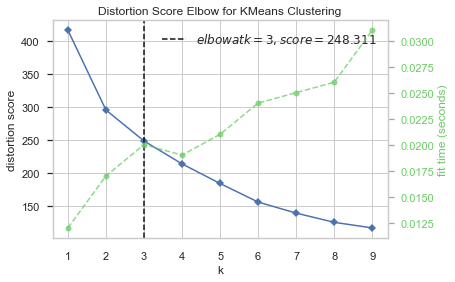

In [169]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [170]:
k = visualizer.elbow_value_ 
print(f'Number of clusters: {k}')

Number of clusters: 3


In order to interpret and characterize the clusters I need to look at the clusters with the original units and not with the normalized data that was fitted in the clustering algorithm. Another measure that can help understand the different characteristics in each cluster is a relative sorting of each record according to the relative frequency of venue type (excluding from the ranking measure the total green area in meter squared and number of playground facilities). In the next two cells, I write a function to add this measure to the original data and to automate the clustering process. 

In [171]:
def make_near_schools_locations_sorted(
    schools_locations=schools_data, location_categories_num=6):
    """schools_locations: The original unnormalized data
    location_categories_num: the number of location types to rank relatively according to frequency of occurence.  
    Returns the original data plus relative rank for each row."""
    def return_most_frequent_locations(row):
        """Helper function that takes a row of data and returns the sorted names of location types. 
         if a record doesn't have all of the relevant categories then it will return None for all missing categories"""
        
        row_categories_sorted = row.iloc[1:].sort_values(ascending=False).index.to_list()
        row_values = row.iloc[1:].sort_values(ascending=False).to_list()
        if 0 in row_values:
            empty_category_index = row_values.index(0)
            return [loc_category for loc_category, _ in zip_longest(
                row_categories_sorted[:empty_category_index], range(location_categories_num))]
        else:
            return row_categories_sorted

    schools_venues_data =  pd.concat(
        [schools_locations.loc[:,'school_id'], schools_locations.loc[:,'daycare':'pizza']], axis=1)

    # create columns according to number of location_categories_num
    categories_index = range(1, location_categories_num + 1)
    indicators = ['st', 'nd', 'rd']
    columns = ['school_id']
    for index, indicator in zip_longest(categories_index, indicators, fillvalue='th'):
        columns.append(f'{index}{indicator} most frequent relevant category near school')

    # create a new dataframe with the new columns
    schools_locations_sorted = pd.DataFrame(columns=columns)
    schools_locations_sorted['school_id'] = schools_locations['school_id']
    # fill the data for each school
    for ind in np.arange(schools_locations.shape[0]):
        schools_locations_sorted.iloc[ind, 1:] = return_most_frequent_locations(schools_venues_data.iloc[ind, :])

    # Add school_location
    schools_locations_sorted = schools_locations.merge(
        schools_locations_sorted, on='school_id')
    return schools_locations_sorted

In [172]:
schools_locations_sorted = make_near_schools_locations_sorted()
schools_locations_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   school_id                                        52 non-null     object 
 1   green_area                                       52 non-null     float64
 2   playground_facilities                            52 non-null     float64
 3   daycare                                          52 non-null     uint8  
 4   dog_garden                                       52 non-null     uint8  
 5   ice_cream                                        52 non-null     uint8  
 6   kindergarten                                     52 non-null     uint8  
 7   parents_fun                                      52 non-null     uint8  
 8   pizza                                            52 non-null     uint8  
 9   1st most frequent relevant categor

In [173]:
schools_locations_sorted.head()

school_id  green_area  playground_facilities  daycare  dog_garden  \
0  599-300150    24533.94                    0.0        2           1   
1  599-300230    91212.78                    9.0        1           2   
2  599-300310   229716.23                    0.0        1           1   
3  599-300490   258827.36                    4.0        1           2   
4  599-300640     3472.01                    0.0        0           0   

   ice_cream  kindergarten  parents_fun  pizza  \
0          3             9            3      4   
1          0            10            0      0   
2          0             8            0      0   
3          2             9            5      4   
4          0             8            0      1   

  1st most frequent relevant category near school  \
0                                    kindergarten   
1                                    kindergarten   
2                                    kindergarten   
3                                    kindergarten   
4                                    kindergarten   

  2nd most frequent relevant category near school  \
0                                           pizza   
1                                      dog_garden   
2                                      dog_garden   
3                                     parents_fun   
4                                           pizza   

  3rd most frequent relevant category near school  \
0                                     parents_fun   
1                                         daycare   
2                                         daycare   
3                                           pizza   
4                                            None   

  4th most frequent relevant category near school  \
0                                       ice_cream   
1                                            None   
2                                            None   
3                                       ice_cream   
4                                            None   

  5th most frequent relevant category near school  \
0                                         daycare   
1                                            None   
2                                            None   
3                                      dog_garden   
4                                            None   

  6th most frequent relevant category near school  
0                                      dog_garden  
1                                            None  
2                                            None  
3                                         daycare  
4                                            None

In [174]:
def make_clustes(X=X, data=schools_locations_sorted, n_clusters=k, random_state=0):
    '''This function automate the cluster making process 
    X           : the normalized features to clusters
    data        : the data with the original values
    n_clusters  : number of clusters
    random_state: for reproducibility
    the function returns a tuple with: 
         the original data with the cluster labels,
         a list of the clusters
    '''
    data = data.copy()
    # run k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X)
    # add clustering labels
    if 'Cluster Labels' in data.columns:
        data.drop('Cluster Labels', 1, inplace=True)
    data.insert(0, 'Cluster Labels', kmeans.labels_)
    clusters = []
    # for each cluster lable, Ceate a cluster and put it into clusters list 
    for label in data['Cluster Labels'].sort_values().unique():
        clusters.append(data.loc[data['Cluster Labels'] == label,])
    return data, clusters

In [175]:
data, clusters = make_clustes()

# Results

In [176]:
data.loc[:, ['Cluster Labels', 'school_id']].groupby('Cluster Labels').count().rename({'school_id': 'School Count'},axis=1)

School Count
Cluster Labels              
0                         11
1                         12
2                         29

In [177]:
def visualize_clusters(df):
    """df: dataframe of schools with Cluster Labels
    return an html of Interactive map visualization of the schools with cluster color coding"""
    kclusters = len(df['Cluster Labels'].unique())

    # create map
    tel_aviv_map = folium.Map(location=(TA_LATITUDE, TA_LONGITUDE), tiles='Stamen Terrain', zoom_start=12)
    # set color scheme for the clusters
    x = np.arange(kclusters)
    ys = [i + x + (i*x)**2 for i in range(kclusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add circle markers to the map
    for _, row in df.iterrows():    
        folium.CircleMarker(
            location=[row.latitude, row.longitude],
            radius=8,
            tooltip='Cluster Label: ' + str(row['Cluster Labels']) + ', ' + vis_map['school']['popup'](row),
            color=rainbow[row['Cluster Labels']],
            fill=True,
            fill_color=rainbow[row['Cluster Labels']],
            fill_opacity=0.7).add_to(tel_aviv_map)
    # add markers icons to the map
        folium.Marker(
            location=[row.latitude, row.longitude],
            popup='Cluster Label-' + str(row['Cluster Labels']) + ': ' + vis_map['school']['popup'](row),
            icon=folium.Icon(
                icon='home', icon_color=rainbow[row['Cluster Labels']], 
                icon_size=(1, 1))).add_to(tel_aviv_map)
    
    def cluster_legend_row(k, color):
        return f'&nbsp; Cluster {k} &nbsp; <i class="fa fa-home fa-2x" style="color:{color}"></i><br>'

    html_legend = f'''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 155px; height: 120px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                ">&nbsp; Clusters: <br>
                {"  ".join([cluster_legend_row(k, color) for k, color in enumerate(rainbow)])}
            </div>
    '''
    tel_aviv_map.get_root().html.add_child(folium.Element(html_legend))
    tel_aviv_map.save('schools_cluster_map.html')
    return HTML(tel_aviv_map._repr_html_())

In [178]:
visualize_clusters(data.merge(school_df, on='school_id'))

Note: Unfortunately the folium maps do not render on GitHub.
drop the github link to this .ipynb file into [nbviewer.jupyter.org](https://nbviewer.jupyter.org/) and get a full dynamic output

## Characterization of the clusters

In [179]:
data.groupby('Cluster Labels').mean().round(1)

green_area  playground_facilities  daycare  dog_garden  \
Cluster Labels                                                           
0                 175144.7                   13.8      1.5         1.3   
1                  23896.6                    2.2      1.4         0.9   
2                  49964.0                   11.3      2.1         2.0   

                ice_cream  kindergarten  parents_fun  pizza  
Cluster Labels                                               
0                     1.1          14.6          1.4    2.3  
1                     4.6           7.7         20.8    5.0  
2                     0.5           6.7          1.2    1.0

**Visual examination of clusters data**

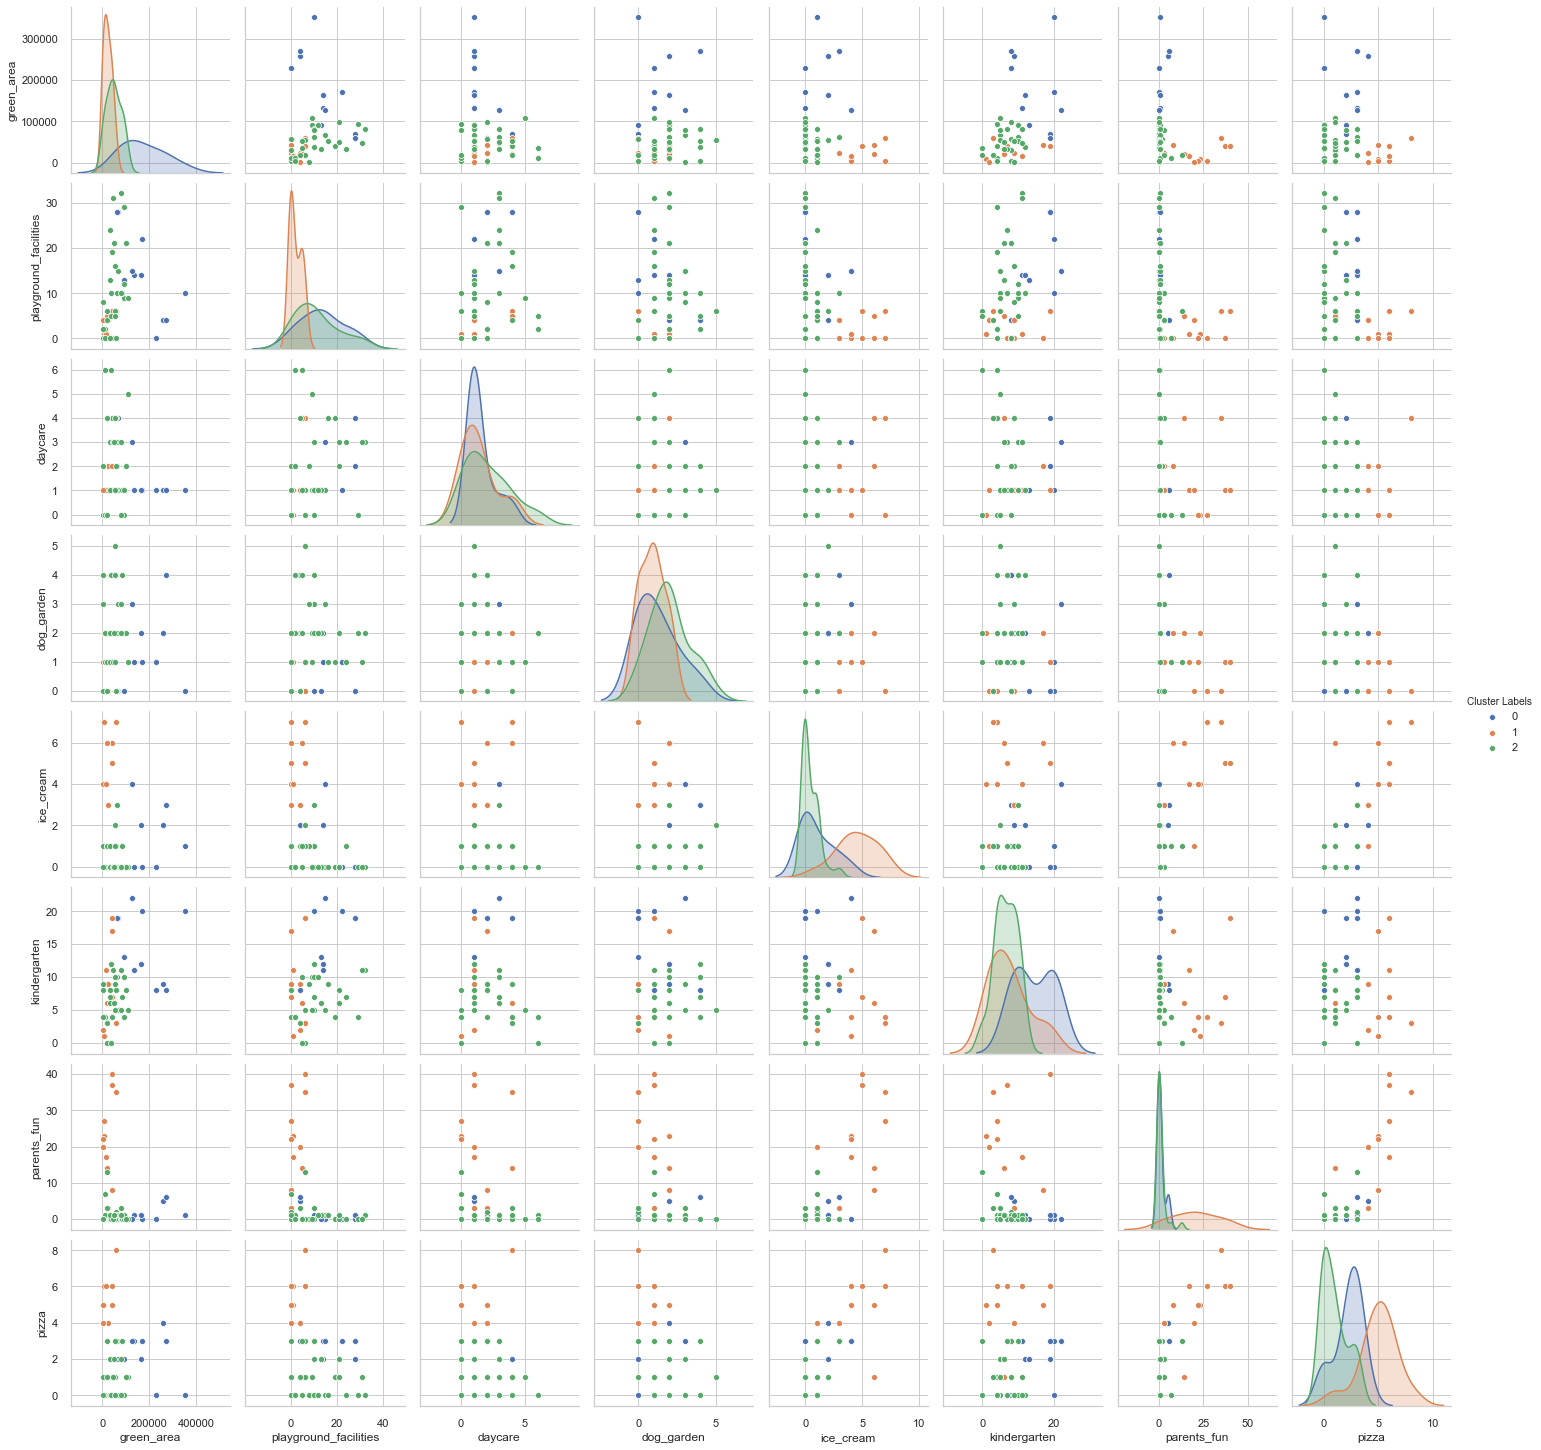

In [180]:
clusters_pairplot =  sns.pairplot(data, hue='Cluster Labels')
plt.savefig('clusters_pairplot.png')

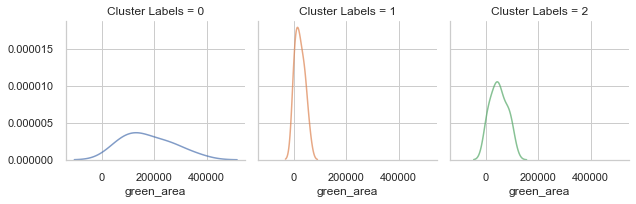

In [181]:
green_kde = sns.FacetGrid(data, col="Cluster Labels", hue='Cluster Labels')
green_kde.map(sns.kdeplot, "green_area", alpha=.7)
plt.savefig('green_hist.png')

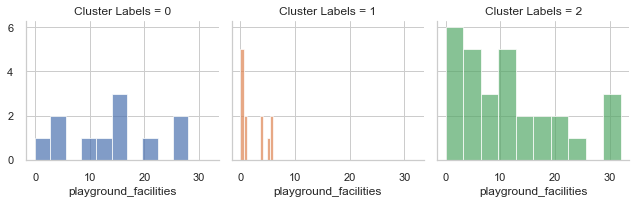

In [182]:
playground_hist = sns.FacetGrid(data, col="Cluster Labels", hue='Cluster Labels')
playground_hist.map(plt.hist, "playground_facilities", alpha=.7)
plt.savefig('playground_hist.png')

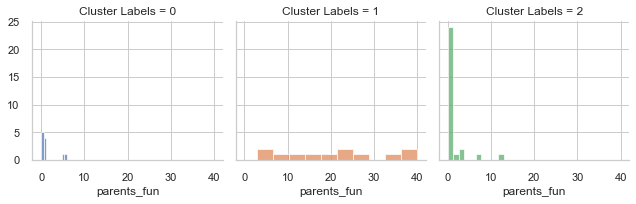

In [183]:
parents_fun_hist = sns.FacetGrid(data, col="Cluster Labels", hue='Cluster Labels')
parents_fun_hist.map(plt.hist, "parents_fun", alpha=.7)
plt.savefig('parents_fun_hist.png')

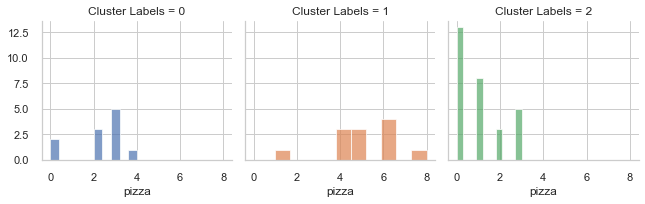

In [184]:
pizza_hist = sns.FacetGrid(data, col="Cluster Labels", hue='Cluster Labels')
pizza_hist.map(plt.hist, "pizza", alpha=.7)
plt.savefig('pizza_hist.png') 

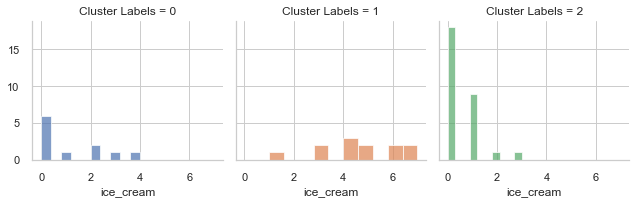

In [185]:
ice_cream_hist = sns.FacetGrid(data, col="Cluster Labels", hue='Cluster Labels')
ice_cream_hist.map(plt.hist, "ice_cream", alpha=.7)
plt.savefig('ice_cream_hist.png')

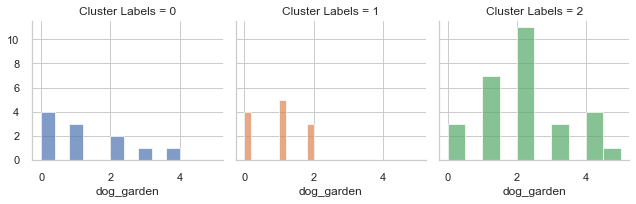

In [186]:
dog_garden_hist = sns.FacetGrid(data, col='Cluster Labels', hue='Cluster Labels')
dog_garden_hist.map(plt.hist, 'dog_garden', alpha=.7)
plt.savefig('dog_garden_hist.png')

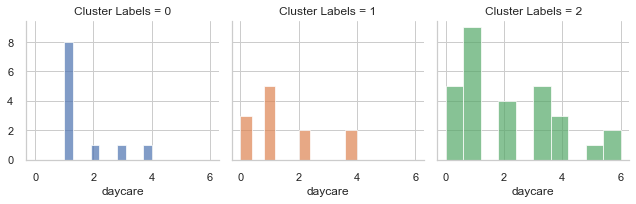

In [187]:
daycare_hist = sns.FacetGrid(data, col='Cluster Labels', hue='Cluster Labels')
daycare_hist.map(plt.hist, 'daycare', alpha=.7)
plt.savefig('daycare_hist.png')

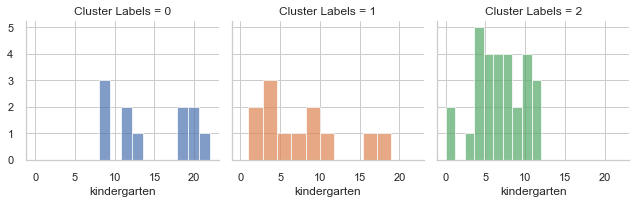

In [188]:
kindergarten_hist = sns.FacetGrid(data, col='Cluster Labels', hue='Cluster Labels')
kindergarten_hist.map(plt.hist, 'kindergarten', alpha=.7)
plt.savefig('kindergarten_hist.png')

# Discussion

According to my conclusions, **cluster 0** seems most suitable for the client’s needs. This cluster
averages highest on green areas and children’s playgrounds, both of which are important to the
client. Cluster 0 is also very diverse in terms of types of venues. Only in this cluster does each school
have more than one venue of each location type on average.
Geographically speaking, we see that while it is not entirely homogenous, cluster 0 is mainly located
in the northern neighborhoods of Tel Aviv. This finding seems consistent with the strong social-
economic profile of these neighborhoods.

As the visualization shows, **cluster 1** is located in the center of the city. This cluster is less suitable for
my client, as it contains the smallest amount of green areas and playgrounds of the three clusters.
However, cluster 1 does meet some of the client’s needs, as it has a wide variety of pubs/bars, pizza
parlours and ice cream parlours.

**Cluster 2** is somewhat in the middle. It contains more green areas and playgrounds than cluster 1
but less than cluster 0. It has more daycares and dog gardens than cluster 0, but less pubs/bars, pizza
and ice cream parlours. It is far less diverse in terms of location types. This cluster
seems least suited for the client’s needs, mainly because geographically, it is located mostly in the
southern, eastern and northern margins of the city (the west is occupied by the Mediterranean Sea).
These locations, most of which are far from the city center, make it difficult to manage without a
private vehicle, as my client plans to do. Additionally, even assuming the client is willing to sacrifice
the proximity to the city center (including such parameters as bars/pubs or family weekly tradition),
in favor of green areas and playgrounds, it would make more sense to choose cluster 0 and not
cluster 2.

As we can see in the illustrations, there is a variance in the distribution of location types within the
clusters. Therefore, I will examine the other clusters as well and will highlight one particularly
diverse and interesting school in each cluster.

## Highlighting candidate Schools in each cluster

**Cluster 0**

In [189]:
clusters[0]

Cluster Labels   school_id  green_area  playground_facilities  daycare  \
2                0  599-300310   229716.23                    0.0        1   
3                0  599-300490   258827.36                    4.0        1   
9                0  599-301220   169984.71                   22.0        1   
10               0  599-301300   133291.67                   14.0        1   
14               0  599-301710   128109.47                   15.0        3   
20               0  599-302470   164948.64                   14.0        1   
25               0  599-304030   270624.33                    4.0        1   
29               0  599-306010   351854.21                   10.0        1   
34               0  599-311120    90396.88                   13.0        1   
45               0  599-316170    68448.58                   28.0        4   
48               0  599-318230    60389.19                   28.0        2   

    dog_garden  ice_cream  kindergarten  parents_fun  pizza  \
2            1          0             8            0      0   
3            2          2             9            5      4   
9            1          0            20            0      3   
10           1          0            11            1      3   
14           3          4            22            0      3   
20           2          2            12            1      2   
25           4          3             8            6      3   
29           0          1            20            1      0   
34           0          0            13            0      2   
45           0          0            19            0      2   
48           0          0            19            1      3   

   1st most frequent relevant category near school  \
2                                     kindergarten   
3                                     kindergarten   
9                                     kindergarten   
10                                    kindergarten   
14                                    kindergarten   
20                                    kindergarten   
25                                    kindergarten   
29                                    kindergarten   
34                                    kindergarten   
45                                    kindergarten   
48                                    kindergarten   

   2nd most frequent relevant category near school  \
2                                       dog_garden   
3                                      parents_fun   
9                                            pizza   
10                                           pizza   
14                                       ice_cream   
20                                           pizza   
25                                     parents_fun   
29                                     parents_fun   
34                                           pizza   
45                                         daycare   
48                                           pizza   

   3rd most frequent relevant category near school  \
2                                          daycare   
3                                            pizza   
9                                       dog_garden   
10                                     parents_fun   
14                                           pizza   
20                                       ice_cream   
25                                      dog_garden   
29                                       ice_cream   
34                                         daycare   
45                                           pizza   
48                                         daycare   

   4th most frequent relevant category near school  \
2                                             None   
3                                        ice_cream   
9                                          daycare   
10                                      dog_garden   
14                                      dog_garden   
20                                     

I will try to highlight schools with as many different location types as possible, as opposed to number
of venues. I do so thinking it is probably preferable to have, for example, one bar and one dog
garden in near proximity, than to have ten bars but no dog gardens at all.

In [190]:
def filter_cluster(cluster, all_venues=True, venue_list=None):
    if all_venues:
        cluster_index = cluster.loc[:, 'green_area':'pizza'].all(axis=1)
    else:
        if venue_list is None:
            return None
        cluster_index =  cluster.loc[:, venue_list].all(axis=1)
    return cluster.loc[cluster_index, :]

In [191]:
filter_cluster(clusters[0], all_venues=True)

Cluster Labels   school_id  green_area  playground_facilities  daycare  \
3                0  599-300490   258827.36                    4.0        1   
20               0  599-302470   164948.64                   14.0        1   
25               0  599-304030   270624.33                    4.0        1   

    dog_garden  ice_cream  kindergarten  parents_fun  pizza  \
3            2          2             9            5      4   
20           2          2            12            1      2   
25           4          3             8            6      3   

   1st most frequent relevant category near school  \
3                                     kindergarten   
20                                    kindergarten   
25                                    kindergarten   

   2nd most frequent relevant category near school  \
3                                      parents_fun   
20                                           pizza   
25                                     parents_fun   

   3rd most frequent relevant category near school  \
3                                            pizza   
20                                       ice_cream   
25                                      dog_garden   

   4th most frequent relevant category near school  \
3                                        ice_cream   
20                                      dog_garden   
25                                           pizza   

   5th most frequent relevant category near school  \
3                                       dog_garden   
20                                     parents_fun   
25                                       ice_cream   

   6th most frequent relevant category near school  
3                                          daycare  
20                                         daycare  
25                                         daycare

All of the above are great candidates. so i will print there report.

In [192]:
def save_school_html(school_id):
    """print school report, show the school map and save the html map to a file with the name of the school_id"""
    school_map = school_report(school_id)
    school_map.save(str(school_id) + '.html')
    return HTML(school_map._repr_html_())

save_school_html('599-300490')

School: 599-300490, In Neighborhood: 511-22, Address: Antigonus St 6, Tel Aviv-Yafo, Israel.
----------------------------------------------------------------------------------------------------------------
The School has 1 nearby Daycare:
  1. 624-33     ,approximately 85 meters from the school.
 
The School has 2 nearby Dog Gardens:
  1. 586-9      ,approximately 297 meters from the school.
  2. 586-72     ,approximately 485 meters from the school.
 
The School has 9 nearby Kindergartens:
  1. 598-21131  ,approximately 429 meters from the school.
  2. 598-54441  ,approximately 252 meters from the school.
  3. 598-54442  ,approximately 252 meters from the school.
  4. 598-54443  ,approximately 252 meters from the school.
  5. 598-54444  ,approximately 252 meters from the school.
  6. 598-80111  ,approximately 216 meters from the school.
  7. 598-212121 ,approximately 216 meters from the school.
  8. 598-287121 ,approximately 496 meters from the school.
  9. 598-287122 ,approximately 49

In [193]:
save_school_html('599-304030')

School: 599-304030, In Neighborhood: 511-23, Address: Shim'on ha-Tarsi St 31, Tel Aviv-Yafo, Israel.
----------------------------------------------------------------------------------------------------------------
The School has 1 nearby Daycare:
  1. 624-33     ,approximately 413 meters from the school.
 
The School has 4 nearby Dog Gardens:
  1. 586-9      ,approximately 397 meters from the school.
  2. 586-10     ,approximately 465 meters from the school.
  3. 586-72     ,approximately 95 meters from the school.
  4. 586-75     ,approximately 476 meters from the school.
 
The School has 8 nearby Kindergartens:
  1. 598-21131  ,approximately 230 meters from the school.
  2. 598-54441  ,approximately 332 meters from the school.
  3. 598-54442  ,approximately 332 meters from the school.
  4. 598-54443  ,approximately 332 meters from the school.
  5. 598-54444  ,approximately 332 meters from the school.
  6. 598-96131  ,approximately 240 meters from the school.
  7. 598-284801 ,approxim

In [194]:
save_school_html('599-302470')

School: 599-302470, In Neighborhood: 511-7, Address: Asher Barash St 2, Tel Aviv-Yafo, Israel.
----------------------------------------------------------------------------------------------------------------
The School has 1 nearby Daycare:
  1. 624-38     ,approximately 483 meters from the school.
 
The School has 2 nearby Dog Gardens:
  1. 586-21     ,approximately 201 meters from the school.
  2. 586-51     ,approximately 287 meters from the school.
 
The School has 12 nearby Kindergartens:
  1. 598-116191 ,approximately 411 meters from the school.
  2. 598-153131 ,approximately 455 meters from the school.
  3. 598-153132 ,approximately 455 meters from the school.
  4. 598-182181 ,approximately 470 meters from the school.
  5. 598-182182 ,approximately 470 meters from the school.
  6. 598-195131 ,approximately 496 meters from the school.
  7. 598-195132 ,approximately 496 meters from the school.
  8. 598-220121 ,approximately 485 meters from the school.
  9. 598-220122 ,approximatel

**Cluster 1**

In [195]:
filter_cluster(clusters[1], all_venues=True)

Cluster Labels   school_id  green_area  playground_facilities  daycare  \
26               1  599-305100    16059.03                    1.0        1   
32               1  599-309650    39471.88                    6.0        1   
37               1  599-312520    21166.73                    5.0        4   

    dog_garden  ice_cream  kindergarten  parents_fun  pizza  \
26           1          4            11           17      6   
32           1          5            19           40      6   
37           2          6             6           14      1   

   1st most frequent relevant category near school  \
26                                     parents_fun   
32                                     parents_fun   
37                                     parents_fun   

   2nd most frequent relevant category near school  \
26                                    kindergarten   
32                                    kindergarten   
37                                    kindergarten   

   3rd most frequent relevant category near school  \
26                                           pizza   
32                                           pizza   
37                                       ice_cream   

   4th most frequent relevant category near school  \
26                                       ice_cream   
32                                       ice_cream   
37                                         daycare   

   5th most frequent relevant category near school  \
26                                      dog_garden   
32                                      dog_garden   
37                                      dog_garden   

   6th most frequent relevant category near school  
26                                         daycare  
32                                         daycare  
37                                           pizza

'599-309650': I'm highlighting this school because it has the largest green area, most playground facilities and a lot of bars, so it is the best representation of the cluster from the options with maximum diversity of location types.

In [196]:
save_school_html('599-309650')

School: 599-309650, In Neighborhood: 511-28, Address: Balfour St 12, Tel Aviv-Yafo, Israel.
----------------------------------------------------------------------------------------------------------------
The School has 1 nearby Daycare:
  1. 624-14     ,approximately 482 meters from the school.
 
The School has 1 nearby Dog Garden:
  1. 586-3      ,approximately 465 meters from the school.
 
The School has 19 nearby Kindergartens:
  1. 598-9191   ,approximately 318 meters from the school.
  2. 598-9192   ,approximately 318 meters from the school.
  3. 598-9193   ,approximately 318 meters from the school.
  4. 598-9194   ,approximately 318 meters from the school.
  5. 598-9195   ,approximately 318 meters from the school.
  6. 598-9196   ,approximately 318 meters from the school.
  7. 598-9197   ,approximately 318 meters from the school.
  8. 598-9198   ,approximately 318 meters from the school.
  9. 598-9199   ,approximately 318 meters from the school.
  10. 598-60151  ,approximately 3

**Cluster 2**

In [197]:
filter_cluster(clusters[2], all_venues=True)

Empty DataFrame
Columns: [Cluster Labels, school_id, green_area, playground_facilities, daycare, dog_garden, ice_cream, kindergarten, parents_fun, pizza, 1st most frequent relevant category near school, 2nd most frequent relevant category near school, 3rd most frequent relevant category near school, 4th most frequent relevant category near school, 5th most frequent relevant category near school, 6th most frequent relevant category near school]
Index: []

I have failed to find a school with at least one venue of each location type.  I still want to highlight a school in this cluster, so I have consulted with the client about the location type he could most easily do without. The client has suggested ommitting the "parents fun" category (bars/pubs). 

In [198]:
venues_list = ['green_area', 'playground_facilities', 'daycare', 'dog_garden', 'ice_cream', 'kindergarten', 'pizza']
filter_cluster(clusters[2], all_venues=False, venue_list=venues_list)  # Allow for 0 parents_fun

Cluster Labels   school_id  green_area  playground_facilities  daycare  \
11               2  599-301480    61964.43                   10.0        3   
17               2  599-302130    81924.04                   10.0        1   
24               2  599-303380    55394.46                    6.0        1   
43               2  599-315180    53667.06                    5.0        1   

    dog_garden  ice_cream  kindergarten  parents_fun  pizza  \
11           2          3            10            0      3   
17           4          1             7            0      3   
24           5          2             5            0      1   
43           4          1            10            0      3   

   1st most frequent relevant category near school  \
11                                    kindergarten   
17                                    kindergarten   
24                                    kindergarten   
43                                    kindergarten   

   2nd most frequent relevant category near school  \
11                                           pizza   
17                                      dog_garden   
24                                      dog_garden   
43                                      dog_garden   

   3rd most frequent relevant category near school  \
11                                       ice_cream   
17                                           pizza   
24                                       ice_cream   
43                                           pizza   

   4th most frequent relevant category near school  \
11                                         daycare   
17                                       ice_cream   
24                                           pizza   
43                                       ice_cream   

   5th most frequent relevant category near school  \
11                                      dog_garden   
17                                         daycare   
24                                         daycare   
43                                         daycare   

   6th most frequent relevant category near school  
11                                            None  
17                                            None  
24                                            None  
43                                            None

'599-302130': I chose to highlight this school because from all the options that are left after filtering bars/pubs while still searching for maximum variety of location types, it has the largest green area in its proximity. Additionally, there is no school with more playgrounds. Since the client "gave up" "parents fun", he might as well at least enjoy as many green areas and playgrounds as possible.

In [199]:
save_school_html('599-302130')

School: 599-302130, In Neighborhood: 511-56, Address: Kehilat Varsha St 12, Tel Aviv-Yafo, Israel.
----------------------------------------------------------------------------------------------------------------
The School has 1 nearby Daycare:
  1. 624-48     ,approximately 135 meters from the school.
 
The School has 4 nearby Dog Gardens:
  1. 586-23     ,approximately 253 meters from the school.
  2. 586-31     ,approximately 178 meters from the school.
  3. 586-52     ,approximately 436 meters from the school.
  4. 586-54     ,approximately 227 meters from the school.
 
The School has 7 nearby Kindergartens:
  1. 598-84171  ,approximately 466 meters from the school.
  2. 598-186141 ,approximately 469 meters from the school.
  3. 598-186142 ,approximately 469 meters from the school.
  4. 598-271101 ,approximately 163 meters from the school.
  5. 598-271102 ,approximately 163 meters from the school.
  6. 598-271103 ,approximately 163 meters from the school.
  7. 598-271104 ,approxima

Note: Unfortunately the folium maps do not render on GitHub.
drop the github link to this .ipynb file into [nbviewer.jupyter.org](https://nbviewer.jupyter.org/) and get a full dynamic output

# Custom search query

Segmentation assists us in understanding and characterizing the different possibilities. While this is an extremely valuable tool, it is important to remember that our client is less interested in public policy and more interested in making a joint decision with his family about their concrete living situation. The function described below makes it easier to do so due to its flexibility. It is an interactive function, which allows experimentation and provides the client with a simple instrument for filtering schools in accordance with his preferences and minimal requirements. The function allows the client to define the minimal number of venues required from each location type and to explore all of his options. It does not provide him with the same information as segmentation, but assists him and his family in narrowing down their possibilities and making an informed decision.

In [200]:
def create_filter_index(df, field, min_val, max_val=None):
    if max_val is None:
        return data[field] >= min_val
    return data[field].between(min_val,max_val)

In [201]:
def join_filters(*filters):
    return reduce(operator.and_, filters)

In [202]:
def custom_search_query():
    venue_filters_map = {
    'green_area': 'Enter the minimum green-area (in meters squared) to filter: ',
    'playground_facilities': 'Enter the minimum number of playground facilities to filter: ',
    'daycare': 'Enter the minimum number of daycares to filter: ',
    'dog_garden': 'Enter the minimum number of dog gardens to filter: ',
    'ice_cream': 'Enter the minimum number of ice-cream parlours to filter: ',
    'kindergarten': 'Enter the minimum number of kindergarten to filter: ',
    'parents_fun': 'Enter the minimum number of bars or/and bups to filter: ', 
    'pizza': 'Enter the minimum number of pizza places to filter: '
    }
    filters = []
    for venue in venue_filters_map:
        while True:
            try:
                min_value = int(input(venue_filters_map[venue]))
                break
            except ValueError:
                print('Please Enter only an integer number')
        filters.append(create_filter_index(data, venue, min_value))
    filter_index = join_filters(*filters)
    return data.loc[filter_index, :].copy()

Showing two examples

In [203]:
custom_search_query()

Enter the minimum green-area (in meters squared) to filter: 10000
Enter the minimum number of playground facilities to filter: 5
Enter the minimum number of daycares to filter: 1
Enter the minimum number of dog gardens to filter: 1
Enter the minimum number of ice-cream parlours to filter: 1
Enter the minimum number of kindergarten to filter: 1
Enter the minimum number of bars or/and bups to filter: 2
Enter the minimum number of pizza places to filter: 1


Cluster Labels   school_id  green_area  playground_facilities  daycare  \
32               1  599-309650    39471.88                    6.0        1   
37               1  599-312520    21166.73                    5.0        4   

    dog_garden  ice_cream  kindergarten  parents_fun  pizza  \
32           1          5            19           40      6   
37           2          6             6           14      1   

   1st most frequent relevant category near school  \
32                                     parents_fun   
37                                     parents_fun   

   2nd most frequent relevant category near school  \
32                                    kindergarten   
37                                    kindergarten   

   3rd most frequent relevant category near school  \
32                                           pizza   
37                                       ice_cream   

   4th most frequent relevant category near school  \
32                                       ice_cream   
37                                         daycare   

   5th most frequent relevant category near school  \
32                                      dog_garden   
37                                      dog_garden   

   6th most frequent relevant category near school  
32                                         daycare  
37                                           pizza

In [204]:
custom_search_query()

Enter the minimum green-area (in meters squared) to filter: 50
Enter the minimum number of playground facilities to filter: 2
Enter the minimum number of daycares to filter: 0
Enter the minimum number of dog gardens to filter: 0
Enter the minimum number of ice-cream parlours to filter: 2
Enter the minimum number of kindergarten to filter: 1
Enter the minimum number of bars or/and bups to filter: 5
Enter the minimum number of pizza places to filter: 1


Cluster Labels   school_id  green_area  playground_facilities  daycare  \
3                0  599-300490   258827.36                    4.0        1   
25               0  599-304030   270624.33                    4.0        1   
28               1  599-305510    58757.77                    6.0        4   
32               1  599-309650    39471.88                    6.0        1   
37               1  599-312520    21166.73                    5.0        4   

    dog_garden  ice_cream  kindergarten  parents_fun  pizza  \
3            2          2             9            5      4   
25           4          3             8            6      3   
28           0          7             3           35      8   
32           1          5            19           40      6   
37           2          6             6           14      1   

   1st most frequent relevant category near school  \
3                                     kindergarten   
25                                    kindergarten   
28                                     parents_fun   
32                                     parents_fun   
37                                     parents_fun   

   2nd most frequent relevant category near school  \
3                                      parents_fun   
25                                     parents_fun   
28                                           pizza   
32                                    kindergarten   
37                                    kindergarten   

   3rd most frequent relevant category near school  \
3                                            pizza   
25                                      dog_garden   
28                                       ice_cream   
32                                           pizza   
37                                       ice_cream   

   4th most frequent relevant category near school  \
3                                        ice_cream   
25                                           pizza   
28                                         daycare   
32                                       ice_cream   
37                                         daycare   

   5th most frequent relevant category near school  \
3                                       dog_garden   
25                                       ice_cream   
28                                    kindergarten   
32                                      dog_garden   
37                                      dog_garden   

   6th most frequent relevant category near school  
3                                          daycare  
25                                         daycare  
28                                            None  
32                                         daycare  
37                                           pizza

# Conclusion

This project was devoted to exploring and segmenting elementary schools in Tel Aviv, based on their proximity to other venues that were of particular interest to the client - a friend of mine who has decided to move to the city with his family. The project provides clients, who wish to live near an elementary school, with data concerning other venues in the area, to inform their decision regarding where to rent an apartment. 
To do so, I collected the relevant data from a number of sources. I did some basic data analysis and some exploratory data visualization. I then segmented the schools based on the nearby location of interest, using K-means clustering algorithm, and found three clusters. This resulted in an interesting geographical differentiation between the city center (cluster 1), the Southern and Eastern neighborhoods (cluster 2) and the Northern neighborhoods (cluster 0). The latter cluster was found to be most suitable for the clients needs, as it is most diverse in terms of location types and contains the largest green areas and most playgrounds. This is consistent with the strong social-economic background of the Northern neighborhoods of Tel Aviv, in which most of cluster 0 resides. 
In addition to the general characterization of the segements, I also highlighted three highly diverse schools in cluster 0 and one school in each of the other clusters.

In conclusion, it is noteworthy that at the request of the client, some data that could have also been relevant is currently not factored into the analysis, such as quality of school; cost of rent; other recreational facilities (restaurants, movie theaters, etc.). Thus, there is room for expanding and improving the analysis by adding parameters
that are currently outside the scope of the project. I believe that adding these dimensions to the
clustering algorithm could have yielded very interesting results.
Additionally, it is possible to combine weight for each location type in accordance with different
preferences, so that the segmentation could give more weight to certain places.
It is also possible to think of variations for the features. However, we must remember that possible
variations are endless and that our main objective is to create a model that is valuable for solving a
concrete problem, not a perfect one (no model is perfect!). 

## Reproducibility Appendix

Python Version

In [205]:
sys.version, sys.version_info

('3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]',
 sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0))

Modules version (including jupyter stuff)

In [206]:
# sort by model name (case insensitive)
for modul_name, module_ in sorted(sys.modules.items(), key=lambda tup: tup[0].upper()):  
    if hasattr(module_, '__version__'):
        print(f"{getattr(module_, '__name__'):30} version: {getattr(module_, '__version__')}")

argparse                       version: 1.1
backcall                       version: 0.1.0
branca                         version: 0.3.1
cachetools                     version: 3.1.1
certifi                        version: 2019.11.28
chardet                        version: 3.0.4
chardet.version                version: 3.0.4
colorama                       version: 0.4.3
cryptography                   version: 2.8
cryptography.__about__         version: 2.8
csv                            version: 1.0
ctypes                         version: 1.1.0
cycler                         version: 0.10.0
dateutil                       version: 2.8.1
decimal                        version: 1.70
decorator                      version: 4.4.1
distutils                      version: 3.7.6
folium                         version: 0.10.1
geographiclib                  version: 1.50
geopy                          version: 1.21.0
geopy.geocoders.base           version: 1.21.0
geopy.util                     vers